# <center style="font-size:140%;"> Report - Project #3: Premixed and Non-Premixed Flames

<center>
<span style="font-size:160%;">McGill University, Montreal </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project #3
</center>

<center>Submitted to 
<center>Gilles Bourque
<center>by
<center>Pierrick Hamard (260619897)

<center>November 26th 2019
<center>Montreal, Quebec, Canada

# Table of Contents:

* [Introduction](#Introduction)


* [Part 1 : Mixture Fraction](#Section1) 
    * [1.1 - Temperature and Mass Fractions versus Nozzle Spacing](#Section1_1)
    * [1.2 - Temperature and Mass Fractions versus Bilger's Mixture Fraction](#Section1_2)
    * [1.3 - Comparing Peak Flame Temperature with Equilibrium Temperature](#Section1_3)
    * [1.4 - Varying Air Nozzle Velocity](#Section1_4)
    * [1.5 - Bonus Question: Varying Fuel Composition](#Section1_5)
    
    
* [Part 2: Unstretched, Freely-propagating, Laminar Premixed Flame](#Section2)
    * [2.1 - Flame Structure and Emissions](#Section2_1)
        * [2.1.1 - Obtaining Time Scale](#Section2_1_1)
        * [2.1.2 - Variation of Mass Fractions versus Time](#Section2_1_2)
        * [2.1.3 - Variation of Reaction Rates versus Time](#Section2_1_3)
        * [2.1.4 - Equivalence Ratio Variation](#Section2_1_4)
    * [2.2 - Effect of Equivalence Ratio and Diluents on Flame Speed](#Section2_2)
    * [2.3 - Effect of Pressure on Flame Speed, Flame Thickness, and Emissions of NO-CO](#Section2_3)
    * [2.4 - Bonus Question: Sensitivity Analysis](#Section2_4)
    
    
* [Conclusion](#Conclusion)


<a id='Introduction'><a>

# Introduction:

<br>

The first section of this report will examine the characteristics of a counter flow non-premixed flame, describing a system where the oxidizer and fuel mixtures are separated before they reach the reaction zone. A counter flow diffusion reactor simulated using Cantera will be used to perform the calculations. Flame temperature and mass concentrations will be computed and plotted versus the nozzle spacing, as well as versus the Bilger's Mixture Fraction, which was introduced throughout the course. The variation of these parameters as a result of changes in air nozzle velocity and fuel composition will be studied as well.

The second section will study an un-stretched, freely-propagating, laminar premixed flame, where the flame structure and emissions will be explored. The effects of equivalence ratio, diluents, and pressure will be determined in relation to laminar flame speed. The variation of these parameters as a result of changes in equivalence ratios will be determined.

This project will provide insight on the various applications of premixed and non-premixed flames.

<br>

**Basic packages required for labs**

The Python kernel is initialized for Cantera, Numpy, MatplotLib and yaml with the commands below.

In [2]:
%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt

<br>
<a id='Section1'><a>
<br>

# Part 1 - Mixture Fraction

<br>
An alternative means to describe the fuel-air composition was presented in the non-premixed flame lecture. The mixture fraction can be defined in terms of fuel and air inlets composition either based on species or atomic elements. In this problem, we will investigate the characteristics of a counter flow non-premixed flame. In a counterflow flame, there are two nozzles with narrow spacing between them. One nozzle delivers a fuel stream while the other delivers an air stream. Additionally, there is a stagnation plane where the net velocity of fluid is zero at the midpoint between the two nozzles.

We will consider a fuel inlet composed of pure methane ($\,Y_{CH_4}\,=\,1.0\,$) and an air inlet with a
composition of ($\,Y_{O_2}\,=\,0.233\,,\,Y_{N_2}\,=\,0.767\,$) , as stream 1 and 2, respectively. For this setup, the nozzles
spacing will be $2\,cm$ and an air inlet velocity of $1.5\,m/s$. To stabilize the flame approximately halfway
between the nozzles, the total pressure of both streams is equalized such that:

$$ \rho_{fuel} \, u_{fuel\,nozzle}^2 \;=\; \rho_{air} \, u_{air\,nozzle}^2 $$

A counter flow diffusion reactor will be used in Cantera.

<a id='Section1_1'><a>

## 1.1 - Temperature and Mass Fractions versus Nozzle Spacing

<br>
The temperature T and the mass fractions of oxygen ($\,Y_{O_2}\,$) and of methane ($\,Y_{CH_4}\,$) will be plotted as a function of the spacing between the nozzles.
<br>

In [3]:
# Define Input Parameters:
P0 = ct.one_atm              # initial pressure
T0 = 300.0                   # initial temperature
comp_o = 'O2:0.233, N2:0.767'  # air composition
comp_f = 'CH4:1'            # fuel composition
u_air = 1.5                  # air inlet velocity [m/s]
width = 0.02                 # Nozzle Spacing between inlets is 2 cm
loglevel = 1                 # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('gri30.xml', 'gri30_mix')

# Air Composition
gas.TPY    = T0, P0, comp_o
air_density  = gas.density
# Fuel Composition
gas.TPY    = T0, P0, comp_f
fuel_density = gas.density

# Mass Flow Definition
mdot_o = u_air*air_density
mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)
f2 = ct.CounterflowDiffusionFlame(gas, width=width)
f3 = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.Y = comp_f
f.fuel_inlet.T = T0

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.Y = comp_o
f.oxidizer_inlet.T = T0

# Set the boundary emissivities
f.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)



************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.009e-06      6.443
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      5.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001039      4.977
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02663      2.168
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

............................................


The peak temperature reached is: T = 1939K



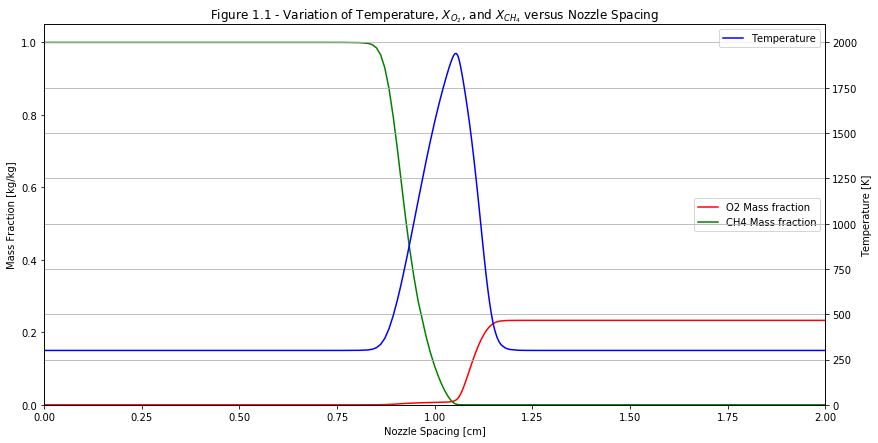

In [4]:
#ax.set_ylim(0,2500)
#plt.xlim(0.000, 0.020)
#plt.legend(loc=1)
fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
ax2.plot(f.flame.grid*100, f.T, label=r'Temperature',color='blue')
ax1.plot(f.flame.grid*100, f.Y[3], label='O2 Mass fraction',color='red')
ax1.plot(f.flame.grid*100,f.Y[13], label='CH4 Mass fraction',color='green')
plt.title('Figure 1.1 - Variation of Temperature, $X_{O_2}$, and $X_{CH_4}$ versus Nozzle Spacing')
ax1.set_xlabel('Nozzle Spacing [cm]')
ax1.set_ylabel('Mass Fraction [kg/kg]')
ax2.set_ylabel('Temperature [K]')
ax2.legend(loc=1)
ax1.legend(loc=5)
plt.xlim([0, 2])
ax1.set_ylim([0, 1.05])
ax2.set_ylim([0,2100])
plt.grid(True)

print('\nThe peak temperature reached is: T = %3.0fK\n' %max(f.T))

<br>

#### Discussion:


<br>

$Figure\;1.1$ shows that the temperature $T$ remains constant at its initial value ($\,T_0\,=\,300\,K\,$) for nozzle spacings between 0 and around 0.8 cm (i.e. 0.8 cm away from the fuel nozzle), then a significant jump in temperature is noticed where $T$ reaches a maximum value of around 1939K at a nozzle spacing of around 1.06 cm, but slightly shifted towards the air nozzle. Afterwhich, the temperature decreases again in a symmetric manner until it reaches its initial value again ($\,T_0\,=\,300\,K\,$) at a nozzle spacing of around 1.2 cm (i.e. again, 0.8 cm away from the air nozzle this time). The symmetry of this temperature distribution makes sense, since in a counterflow flame where there are two streams, there is a stagnation plane where the net velocity of fluid is zero at the midpoint between the two nozzles. At this plane, the temperature reaches its maximum value. However, this plane isn't located exactly in the middle between the fuel nozzle and the air nozzle. This is because the momentum fluxes are not equal, so the flame will stabilize closer to the nozzle dispersing a fluid at a lower flux. In this case the flame is shifted from the center and occurs slightly closer to the air nozzle. A flame is stabilized at the point in the intermediate region where the mixture is stoichiometric. Moreover, an abundance of fuel is required in order to achieve stoichiometric conditions.

As for the mass concentration $\,Y_{CH_4}$, it starts off constant at 1.0 (its given value) at the fuel nozzle, remains constant at this value for nozzle spacings between 0 and around 0.8 cm, then decreases drastically until it reaches 0 at $x\,=\,1.06\,cm$ afterwhich it remains constant at zero. It makes sense that the concentration of $CH_4$ is greatest at the air nozzle, and zero at the air nozzle.

$Y_{O_2}$ on the other hand is zero at the fuel nozzle, and only starts increasing after the nozzle spacing exceeds 1 cm, it then settles off at 0.233 (the initial mass fraction given) and remains constant at this value from $x\,=\,1.2\,cm$ onwards. It makes sense that the concentration of $O_2$, is greatest at the air nozzle, and zero at the fuel nozzle.

<br>

<br>
<a id='Section1_2'><a>

## 1.2 - Temperature and Mass Fractions versus Bilger's Mixture Fraction

<br>
The temperature T and the mass fractions of oxygen ($\,Y_{O_2}\,$) and of methane ($\,Y_{CH_4}\,$) will be plotted as a function of the Bilger's Mixture Fraction.

The Bilger's Mass Fraction, $Z$ is defined as follows:

$$Z=\frac{\frac{Z_C}{mW_C}+\frac{Z_H}{nW_H}+2\frac{Y_{O_2 ,2}\,-\,Z_O}{\nu_{O_2}^\prime W_{O_2}}}{\frac{Z_{C,1}}{mW_C}+\frac{Z_{H,1}}{nW_H}+2\frac{Y_{O,2}}{\nu_{O_2}^\prime W_{O_2}}}$$

where 1 corresponds to the fuel nozzle and 2 corresponds to the air nozzle.

The parameters in this equation are defined as follows:
* $Z_C, Z_H$ and $Z_O$ are the mass fractions of carbon, oxygen and hydrogen in the mixture initially 
* $Z_{C,1}, Z_{H,1}$ and ${Z_O,1} $ are the mass fractions of carbon, oxygen and hydrogen in the mixture evaluated at the fuel inlet
* $m$, $n$ and $\nu^\prime_{O_{2}}$ are the number of carbon atoms, hydrogen atoms, and $O_2$ molecules respectively 
* $W_H, W_O$ and $W_C$ are the molecular weights of Carbon, Hydrogen and Oxygen respectively.

The mass fraction of an individual species can be determined as follows:

$$Z_j=\frac{m_j}{m}=\sum\limits_{i=1}^n\frac{a_{ij}W_j}{W_i}y_j$$

where j corresponds to an element and i corresponds to a species.

<br>

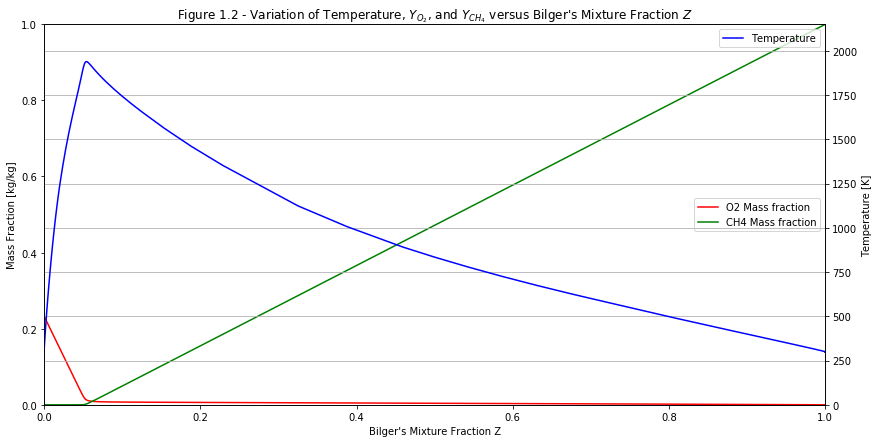

In [8]:
# Element Index
noC = gas.element_index('C')
noO = gas.element_index('O')
noH = gas.element_index('H')

# Species Index
nO2  = gas.species_index('O2')
nCH4 = gas.species_index('CH4')
nCO2 = gas.species_index('CO2')
nCO  = gas.species_index('CO')
nNO  = gas.species_index('NO')

# Number of Species
nspecies = gas.n_species

# Molecular Weights [kg/kmol]
MW = gas.molecular_weights
MWc  = MW[gas.species_index('C')]
MWo2 = MW[gas.species_index('O2')]
MWo  = MW[gas.species_index('O')]
MWh  = MW[gas.species_index('H')]
MWch4 = (1*MWc)+(4*MWh)

# Initialize Zero Matrices
Zc1 = np.zeros((len(f.grid),1))
Zh1 = np.zeros((len(f.grid),1))
Zc  = np.zeros((len(f.grid),1))
Zh  = np.zeros((len(f.grid),1))
Zo  = np.zeros((len(f.grid),1))
Z   = np.zeros((len(f.grid),1))

# Find Values
Zc1 = 1*MWc*f.Y[nCH4,0]/MWch4
Zh1 = 4*MWh*f.Y[nCH4,0]/MWch4
Zc  = 1*MWc*f.Y[nCH4]/MWch4
Zh  = 4*MWh*f.Y[nCH4]/MWch4
Zo  = 2*MWo*f.Y[nO2]/MWo2
Numer   = (Zc/(1*MWc))+(Zh/(4*MWh))+(2*(f.Y[nO2,-1]-Zo)/(2*MWo2))
Denom   = (Zc1/(1*MWc))+(Zh1/(4*MWh))+(2*f.Y[nO2,-1]/(2*MWo2))
Z  = Numer/Denom


fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
ax2.plot(Z, f.T, label=r'Temperature',color='blue')
ax1.plot(Z, f.Y[3], label='O2 Mass fraction',color='red')
ax1.plot(Z,f.Y[13], label='CH4 Mass fraction',color='green')
plt.title('Figure 1.2 - Variation of Temperature, $Y_{O_2}$, and $Y_{CH_4}$ versus Bilger\'s Mixture Fraction $Z$')
ax1.set_xlabel('Bilger\'s Mixture Fraction Z')
ax1.set_ylabel('Mass Fraction [kg/kg]')
ax2.set_ylabel('Temperature [K]')
ax2.legend(loc=1)
ax1.legend(loc=5)
plt.xlim([0, 1])
ax1.set_ylim([0, 1.0])
ax2.set_ylim([0,2150])
plt.grid(True)




<br>

#### Discussion:


<br>

As shown in Figure 1.2, the flame temperature increases drastically from 300 K to around 1900 K as $Z$ is raised from 0 to around 0.06. The peak temperature occurs at a Bilger's mass fraction of approximately 0.06, where the concentrations of both $O_2$ and $CH_4$ are approximately to zero. This agrees with the fact that this is where the flat flame occurs, and also agrees with the Burke Schumann Analytical Solution, as shown below:

*Burke Schumann Solution*:

$$Z_{st} \,=\, \frac{Y_{O2,2}/W_{O2}}{ Y_{O_{2,2}}/W_{O2} + \nu Y_{F,1}/M_{F,1}}  \,=\,  \frac{0.233/32}{0.233/32 \,+\, 2\times1/16} \,=\, 0.055$$

Note that the stoichiometric equation of combustion of methane is:

$$ CH_4 \;+\; 2\,(\,O_2\,+\,3.76\,N_2\,)  \;\;\longrightarrow\;\; \,CO_2 \;+\; 2\,H_2O \;+\; 7.52\,N_2 $$

This low value of $Z_{st}$ makes sense since the mass fraction of the fuel is equal to 1, meaning it is not diluted. If it were diluted, the $Z_{st}$ value is expected to be slighlty larger. As for the mass fraction of $O_2$ in the air, it starts at 0.233 (its initial value at the air nozzle), as expected, then decreases to zero at $Z_{st}$. Similarly, the mass fraction of $CH_4$ in the fuel starts at 1.0 (its initial value at the fuel nozzle), as expected, then decreases to zero at $Z_{st}$.

However, the Burke Shumann solution is not that accurate when it comes to the temperature, as the obtained solution is not linear as the Burke Shumann solution would give. The lines are more curved, especially close to the $Z_{st}$ value.

<br>

<br>
<a id='Section1_3'><a>

## 1.3 - Comparing Peak Flame Temperature with Equilibrium Temperature

In [9]:
print('\nFrom Figure 1.2 above, the peak flame temperature is:\n')
print('T_peak = %5.2f' %max(f.T),'K')

# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}
complete_species = [species[S] for S in ('CH4','CO','NO')]
gas2 = ct.Solution(thermo='IdealGas', species=species.values())
gas2.TPX = 300, 1*ct.one_atm, 'CH4:1, O2:2.0, N2:7.52'
gas2.equilibrate('HP')
T_eq = gas2.T

print('\n\nThe equilibrium (adiabatic flame) temperature is:\n')
print('T_ad = %5.2f' %gas2.T,'K')


From Figure 1.2 above, the peak flame temperature is:

T_peak = 1938.95 K


The equilibrium (adiabatic flame) temperature is:

T_ad = 2225.52 K


<br>

The peak flame temperature obtained using Cantera (1938.95 K) is significantly smaller than the equilibium (adiabatic flame) temperature obtained using a stoichiometric mixture of methane and air at the same conditions (2225.52 K).

This is expected since the simulations performed using Cantera describe a diffusion flame, where the speed of diffusion controls the flame speed and corresponding flame temperature. Additionally, heat loss and the fact that the equilibrium solution represents a perfectly mixed gas, plus the fact that some reactants escape the reaction zone, could explain why the equilibrium temperature is greater than the calculated flame temperature. 

<br>
<a id='Section1_4'><a>

## 1.4 - Varying Air Nozzle Velocity

In [10]:
# New Air Nozzle Velocities
u2_air = 0.1     # m/s
u3_air = 3.3     # m/s

# New Mass Flows
mdot2_o = u2_air*air_density
mdot2_f = np.sqrt((u2_air**2)*air_density*fuel_density)
mdot3_o = u3_air*air_density
mdot3_f = np.sqrt((u3_air**2)*air_density*fuel_density)


# Set the state of the two inlets
f2.fuel_inlet.mdot = mdot2_f
f2.fuel_inlet.Y = comp_f
f2.fuel_inlet.T = T0
f2.oxidizer_inlet.mdot = mdot2_o
f2.oxidizer_inlet.Y = comp_o
f2.oxidizer_inlet.T = T0
# Set the boundary emissivities
f2.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
f2.radiation_enabled = False
f2.set_refine_criteria(ratio=2, slope=0.1, curve=0.2, prune=0.02)
# Solve the problem
f2.solve(loglevel, auto=True)


# Set the state of the two inlets
f3.fuel_inlet.mdot = mdot3_f
f3.fuel_inlet.Y = comp_f
f3.fuel_inlet.T = T0
f3.oxidizer_inlet.mdot = mdot3_o
f3.oxidizer_inlet.Y = comp_o
f3.oxidizer_inlet.T = T0
# Set the boundary emissivities
f3.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
f3.radiation_enabled = False
f3.set_refine_criteria(ratio=2, slope=0.1, curve=0.2, prune=0.02)
# Solve the problem
f3.solve(loglevel, auto=True)


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.339e-06      5.973
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368       5.47
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0007794      4.863
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002219      4.299
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02528      3.446
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solvi

Take 10 timesteps     0.0005474      5.059
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.009e-06      6.274
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      5.922
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002338      4.561
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid re

2073.1047386438554

1938.9463099307925

300.0000000000079

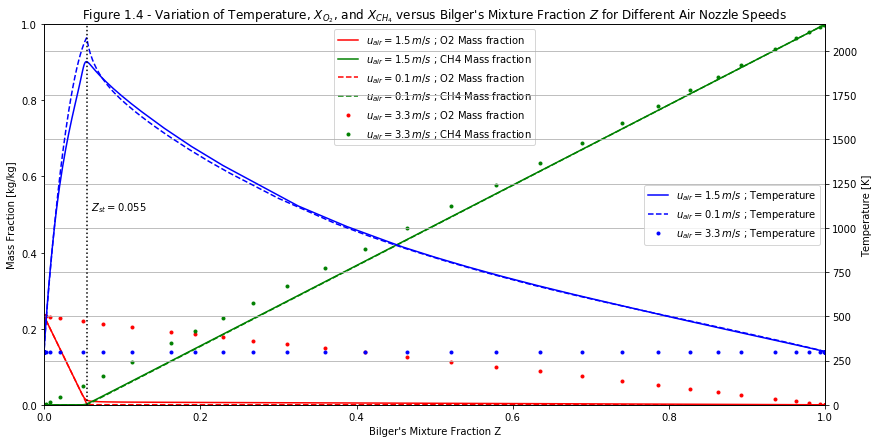

In [28]:
Z2c1 = 1*MWc*f2.Y[nCH4,0]/MWch4
Z2h1 = 4*MWh*f2.Y[nCH4,0]/MWch4
Z2c  = 1*MWc*f2.Y[nCH4]/MWch4
Z2h  = 4*MWh*f2.Y[nCH4]/MWch4
Z2o  = 2*MWo*f2.Y[nO2]/MWo2
Numer2   = (Z2c/(1*MWc))+(Z2h/(4*MWh))+(2*(f2.Y[nO2,-1]-Z2o)/(2*MWo2))
Denom2   = (Z2c1/(1*MWc))+(Z2h1/(4*MWh))+(2*f2.Y[nO2,-1]/(2*MWo2))
Z2  = Numer2/Denom2

Z3c1 = 1*MWc*f3.Y[nCH4,0]/MWch4
Z3h1 = 4*MWh*f3.Y[nCH4,0]/MWch4
Z3c  = 1*MWc*f3.Y[nCH4]/MWch4
Z3h  = 4*MWh*f3.Y[nCH4]/MWch4
Z3o  = 2*MWo*f3.Y[nO2]/MWo2
Numer3   = (Z3c/(1*MWc))+(Z3h/(4*MWh))+(2*(f3.Y[nO2,-1]-Z3o)/(2*MWo2))
Denom3   = (Z3c1/(1*MWc))+(Z3h1/(4*MWh))+(2*f3.Y[nO2,-1]/(2*MWo2))
Z3  = Numer3/Denom3

fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
ax2.plot(Z, f.T, label=r'$u_{air}=1.5\,m/s$ ; Temperature',color='blue')
ax1.plot(Z, f.Y[3], label='$u_{air}=1.5\,m/s$ ; O2 Mass fraction',color='red')
ax1.plot(Z,f.Y[13], label='$u_{air}=1.5\,m/s$ ; CH4 Mass fraction',color='green')
ax2.plot(Z2, f2.T, '--', label=r'$u_{air}=0.1\,m/s$ ; Temperature',color='blue')
ax1.plot(Z2, f2.Y[3], '--', label='$u_{air}=0.1\,m/s$ ; O2 Mass fraction',color='red')
ax1.plot(Z2,f2.Y[13], '--', label='$u_{air}=0.1\,m/s$ ; CH4 Mass fraction',color='green')
ax2.plot(Z3, f3.T, '.', label=r'$u_{air}=3.3\,m/s$ ; Temperature',color='blue')
ax1.plot(Z3, f3.Y[3], '.', label='$u_{air}=3.3\,m/s$ ; O2 Mass fraction',color='red')
ax1.plot(Z3,f3.Y[13], '.', label='$u_{air}=3.3\,m/s$ ; CH4 Mass fraction',color='green')
plt.title('Figure 1.4 - Variation of Temperature, $X_{O_2}$, and $X_{CH_4}$ versus Bilger\'s Mixture Fraction $Z$ for Different Air Nozzle Speeds')
ax1.set_xlabel('Bilger\'s Mixture Fraction Z')
ax1.set_ylabel('Mass Fraction [kg/kg]')
ax2.set_ylabel('Temperature [K]')
ax2.legend(loc=5)
ax1.legend(loc=9)
plt.xlim([0, 1])
ax1.set_ylim([0, 1.0])
ax2.set_ylim([0,2150])
plt.grid(True)
plt.text(0.06, 1100, r'$Z_{st}=0.055$')
plt.axvline(x=0.055, ls=':',label='Z = 0.055', color='k', )

display(max(f2.T))
display(max(f.T))
display(max(f3.T))

<br>

#### Discussion:


<br>

Figure 1.4 shows that as the air nozzle speed is increased from 0.1 to 1.5 to 3.3 m/s, the maximum value of flame temperature decreases (from around 2073 K to 1939 K to 300 K), but it remains located at the same $Z_{st}$ value equal to around 0.06 for the 0.1m/s and 1.5m/s flow case. Before the peak (i.e. towards the air nozzle), the temperature values are slightly greater for the small nozzle speed data (0.1m/s). However, for the high speed nozzle case (3.3m/s) we see that the temperature remains constant at its initial temperature of 300K. This is a result of having the air nozzle velocity too high for a flame to properly form and stabilize. doesn't have enough time to reach its maximum value of temperature and thickness. As local velocity gradients increase, more reactants (fuel) escape the reaction zone, which accounts for the reduction in maximum temperature of a flame. This eventually leads to flame extinction, which is the case at 3.3m/s air flow.

The reason behind the descrepancies in the temperature plots for the (0.1m/s and 1.5m/s) air inlet velocities could be explained by the fact that as the air nozzle speed is increased, the flame becomes unstable and "fizzles out"; in other words it doesn't have enough time to reach its maximum value of temperature and thickness.

As for mass concentrations (for the 0.1m/s and 1.5m/s air inlet velocities), as you increase the air inlet velocity up to a certain point, the concentrations of O2 and CH4 remain looking almost linear throughout (data values very close to each other), and they are both approximately equal to zero at the stoichiometric Bilger Mixture Fraction $Z_{st}$, as before, where the peak temperature is achieved. These results are expected, but is not the case for the 3.3m/s air inlet velocity where the flame becomes exctinct.


<br>

<br>
<a id='Section1_5'><a>

## 1.5 - Bonus Question: Varying Fuel Composition

In [130]:
# Define Input Parameters:
P0 = ct.one_atm                 # initial pressure
T0 = 300.0                      # initial temperature
comp_o = 'O2:0.233, N2:0.767'     # air composition
u_air = 1.5                     # air inlet velocity
width = 0.02                    # Nozzle Spacing between inlets is 2 cm
loglevel = 1                    # amount of diagnostic output (0 to 5)


Y_O2 = []
Y_CH4 = []
T_all = []
Z_all = []

f_CH4 = [1.0, 0.75, 0.5, 0.25]
f_N = [0.0, 0.25, 0.5, 0.75]

for i in range(len(f_CH4)):
    
    comp_o =  'O2:0.233, N2:0.767'  # air composition
    comp_f =  'CH4:{0}, N2:{1}'.format(f_CH4[i],f_N[i])    # fuel composition
    
    u_air = 1.5                  # air inlet velocity
    width = 0.02                 # Nozzle Spacing between inlets is 2 cm
    loglevel = 1                 # amount of diagnostic output (0 to 5)

    # Create the gas object used to evaluate all thermodynamic, kinetic, and
    # transport properties.
    gas = ct.Solution('gri30.xml', 'gri30_mix')

    # Air Composition
    gas.TPY    = T0, P0, comp_o
    air_density  = gas.density
    # Fuel Composition
    gas.TPY    = T0, P0, comp_f
    fuel_density = gas.density

    # Mass Flow Definition
    mdot_o = u_air*air_density
    mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

    loglevel = 1  # amount of diagnostic output (0 to 5)

    # Create an object representing the counterflow flame configuration,
    # which consists of a fuel inlet on the left, the flow in the middle,
    # and the oxidizer inlet on the right.
    f = ct.CounterflowDiffusionFlame(gas, width=width)

    # Set the state of the two inlets
    f.fuel_inlet.mdot = mdot_f
    f.fuel_inlet.Y = comp_f
    f.fuel_inlet.T = T0

    f.oxidizer_inlet.mdot = mdot_o
    f.oxidizer_inlet.Y = comp_o
    f.oxidizer_inlet.T = T0

    # Set the boundary emissivities
    f.set_boundary_emissivities(0.0, 0.0)
    # Turn radiation off
    f.radiation_enabled = False

    f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

    # Solve the problem
    f.solve(loglevel, auto=True)
    
    # Initialize Zero Matrices
    Zc1 = np.zeros((len(f.grid),1))
    Zh1 = np.zeros((len(f.grid),1))
    Zc  = np.zeros((len(f.grid),1))
    Zh  = np.zeros((len(f.grid),1))
    Zo  = np.zeros((len(f.grid),1))
    Z   = np.zeros((len(f.grid),1))

    # Find Values
    Zc1 = 1*MWc*f.Y[nCH4,0]/MWch4
    Zh1 = 4*MWh*f.Y[nCH4,0]/MWch4
    Zc  = 1*MWc*f.Y[nCH4]/MWch4
    Zh  = 4*MWh*f.Y[nCH4]/MWch4
    Zo  = 2*MWo*f.Y[nO2]/MWo2
    Numer   = (Zc/(1*MWc))+(Zh/(4*MWh))+(2*(f.Y[nO2,-1]-Zo)/(2*MWo2))
    Denom   = (Zc1/(1*MWc))+(Zh1/(4*MWh))+(2*f.Y[nO2,-1]/(2*MWo2))
    Z  = Numer/Denom
    
    # Get resulting data
    Y_O2.append(np.asarray(f.Y[nO2]))
    Y_CH4.append(np.asarray(f.Y[nCH4]))
    T_all.append(np.asarray(f.T))
    Z_all.append(np.asarray(Z))


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.009e-06      6.443
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      5.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001039      4.977
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02663      2.168
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

............................................


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      6.338
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001825      5.847
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001299      4.654
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002466      5.402
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001873      4.639
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04799      1.065
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement d


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      6.241
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.041e-05      5.492
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003464      5.456
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001169      4.758
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

............................................

Take 10 timesteps     3.204e-05      5.861
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005474      5.394
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006235      3.713
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

********************* Flame is extinct on 12 point grid **********************

*********** Solving on 24 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.204e-05      6.113
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      5.551
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps

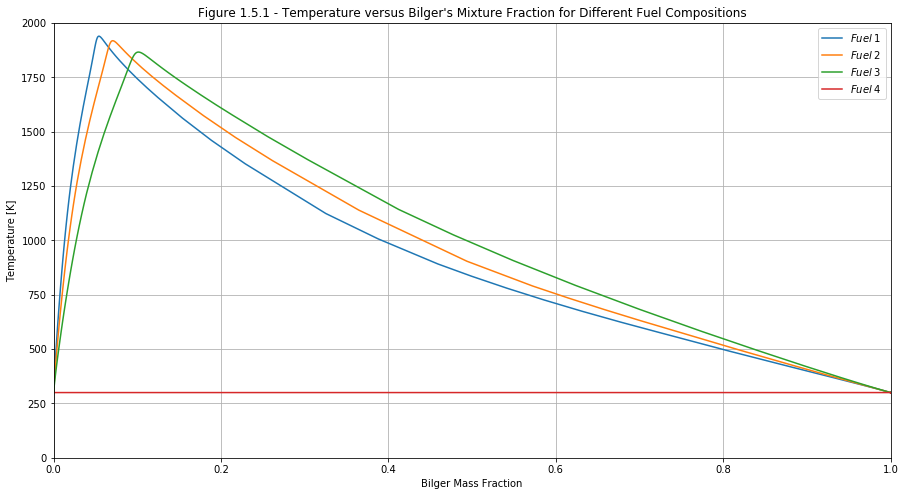

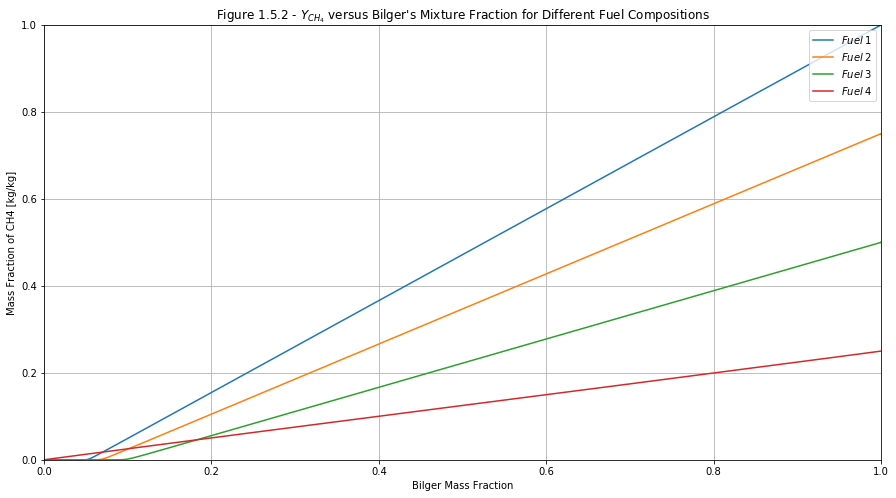

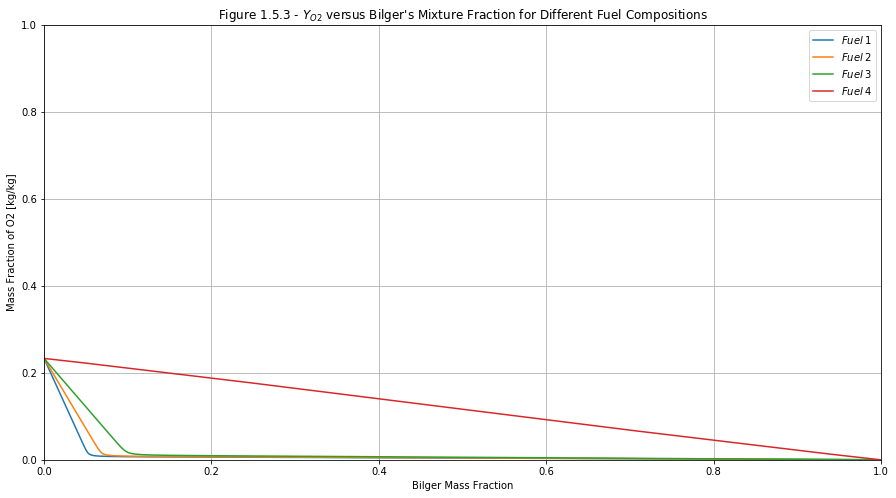

In [134]:
fig = plt.figure(figsize=(15,8))
plt.plot(Z_all[0], T_all[0], label=r'$Fuel \;1$')
plt.plot(Z_all[1], T_all[1], label=r'$Fuel\; 2$')
plt.plot(Z_all[2], T_all[2], label=r'$Fuel \;3$')
plt.plot(Z_all[3], T_all[3], label=r'$Fuel \;4$')
plt.xlabel('Bilger Mass Fraction')
plt.title('Figure 1.5.1 - Temperature versus Bilger\'s Mixture Fraction for Different Fuel Compositions')
plt.legend(loc=1)
plt.ylabel('Temperature [K]')
plt.xlim([0,1])
plt.ylim([0,2000])
plt.grid(True)



fig = plt.figure(figsize=(15,8))
plt.plot(Z_all[0], Y_CH4[0], label=r'$Fuel \;1$')
plt.plot(Z_all[1], Y_CH4[1], label=r'$Fuel\; 2$')
plt.plot(Z_all[2], Y_CH4[2], label=r'$Fuel \;3$')
plt.plot(Z_all[3], Y_CH4[3], label=r'$Fuel \;4$')
plt.xlabel('Bilger Mass Fraction')
plt.ylabel('Mass Fraction of CH4 [kg/kg]')
plt.title('Figure 1.5.2 - $Y_{CH_4}$ versus Bilger\'s Mixture Fraction for Different Fuel Compositions')
plt.legend(loc=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)



fig = plt.figure(figsize=(15,8))
plt.plot(Z_all[0], Y_O2[0], label=r'$Fuel \;1$')
plt.plot(Z_all[1], Y_O2[1], label=r'$Fuel\; 2$')
plt.plot(Z_all[2], Y_O2[2], label=r'$Fuel \;3$')
plt.plot(Z_all[3], Y_O2[3], label=r'$Fuel \;4$')
plt.xlabel('Bilger Mass Fraction')
plt.ylabel('Mass Fraction of O2 [kg/kg]')
plt.title('Figure 1.5.3 - $Y_{O2}$ versus Bilger\'s Mixture Fraction for Different Fuel Compositions')
plt.legend(loc=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)


<br>

#### Discussion:

As the fuel stream is being increasingly diluted with nitrogen, with $Y_F$ decreasing from 1 to 0.25, we observe an increasing $Z$ flame front position and a decreasing maximum temperature. For a methane mass  fraction of 0.25 and nitrogen gas mass fraction of 0.75, we see that the flame is extinguished since the initial temperature of 300K remains constant along the Bilger Mass Fraction. 

The results show that for an increase in NO2 mass concentration, flame stability and ignition enhancing reactions decrease, therefore leading to extinction at this condition.
<br>

<br>
<a id='Section2'><a>

# Part 2 - Unstretched, Freely-Propagating, Laminar Premixed Flame
<br>

In the initial stage of the design of a new combustion system, a few key parameters are evaluated with simple correlations or calculations. In previous projects we have used O-D reactors whereas in this project we will use a 1D reactor, namely, the laminar freely propagating flame.
In this part of the project, we will investigate different aspects of a laminar premixed flame and how they can be used to make basic calculation related to combustion systems. For example, pollutant emissions (NOx and CO), can be evaluated as function of combustor residence time. Effect of richness and pressure can also be estimated with this approach.

<br>
<a id='Section2_1'><a>

## 2.1 - Flame Structure and Emissions

<br>

For a methane-air mixture with $\,\phi\,=\,0.75$, at $T_{ini} \,=\, 300\,K\,$ and $P_{ini} \,=\, 1\,atm\,$, a laminar freely-propagating, adiabatic, 1-D flame (adiabatic 1D reactor) will be simulated using Cantera and used to obtain a converge solution.

The figure below illustrates the setup, in a flame-fixed co-ordinate system. The reactants enter with density $\rho_{u}\,$, temperature $T_{u}$, and speed $S_{u}$. The products exit the flame at speed $S_{b}$, density $\rho_{b}$ and temperature $T_{b}$.

<br>

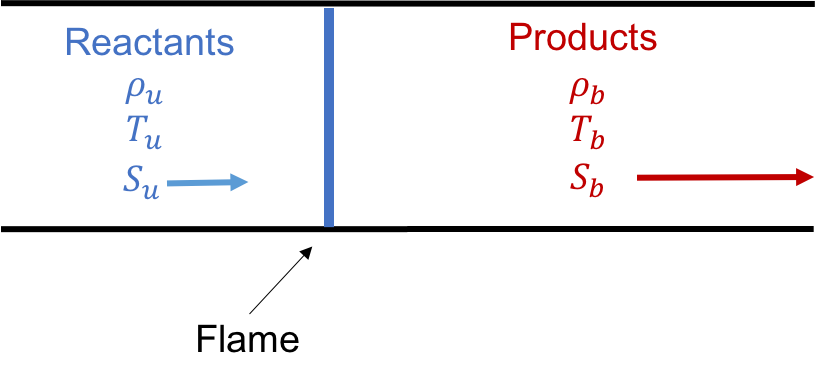

<br>
<a id='Section2_1_1'><a>

### 2.1.1 - Obtaining Time Scale

<br>

Here, the temporal aspects of an un-stretched, freely-propegating, laminar premixed flame will be investigated as opposed to the spatial structure of the flame.

A function will be written that converts the spatial coordinates into a time scale using the following expression where $\Delta x_j$ is the grid spacing at position $j$, $u_j$ is the velocity of the flow at position $j$, and $n$ is the number of grid points:

$$t_i=\sum\limits_{j=1}^i \Delta t_j=\sum\limits_{j=1}^i\frac{\Delta x_j}{u_j}\space\space\space\space\;\;\;\;\;\;\;\;\; i=1,2,3,...,n$$

<br>

In [176]:
# Define the reactant conditions, gas mixture and kinetic mechanism associated with the gas
# Inlet Temperature in Kelvin and Inlet Pressure in Pascals
# In this case we are setting the inlet T and P to room temperature conditions
To = 300        # K
Po = 101325     # Pa

# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas = ct.Solution('gri30.cti')

# Create a CH4/Air premixed mixture with the above specified T and P, and an equivalence ratio of 0.75
gas.TPX = To, Po, 'CH4:0.75, O2:2, N2:7.52'

# Define flame simulation conditions
# Domain width in metres
width = 0.014

# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Define logging level
loglevel = 1

# Solve
flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.u[0]
print("Flame Speed is: {:.2f} cm/s".format(Su0*100))

#Note that the variable Su0 will also be used downsteam in the sensitivity analysis


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.271e-05      4.953
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001095      4.242
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01247      2.983
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 

In [177]:
# Initialize Parameters
flame_velocity = flame.u
flame_grid = flame.grid
HeatRelease = flame.heat_release_rate;
Max_heatrelease = max(flame.heat_release_rate)
t  = np.zeros(len(flame_grid));

# Function to convert from spatial scale to time scale (where t= 0 is located at max heat release)
def spatialscale_to_timescale(grid, velocity):
    
    # First find the original time scale using the given formula
    flame_grid = flame.grid
    t  = np.zeros(len(flame_grid));
    i = 0
    for i in range(len(flame_grid)):
        if i==0: t[i]=0
        else: t[i] = t[i-1] + ((grid[i]-grid[i-1])/velocity[i])
    
    # Now find the time corresponding to maximum heat release
    i = 0
    i0 = 0
    t0 = 0
    heat = flame.heat_release_rate
    heatmax = max(heat)
    for i in range(len(flame_grid)):
        if heat[i]-heatmax == 0:
            i0 = i
            t0 = t[i]
            break
    
    # Adjust time scale to new t0 value
    i = 0
    ti = np.zeros(len(flame_grid))
    for i in range(len(flame_grid)):
        if i==i0: ti[i]=0
        else: ti[i] = t[i] - t0
        
    return t, ti, i0, t0, heat, heatmax


# Use the above function to get the desired results for our grid and velocity field
[t, ti, i0, t0, HeatRelease, Max_heatrelease] = spatialscale_to_timescale(flame_grid,flame_velocity)


print('\nThe following original time coordinate values were obtained using the given equation (boundary of domain):\n')
print('ti =\n')
print(t)

print('\n\nThe max heat release value is %5.2e  [W/m^3]' %Max_heatrelease)
print('It occurs at time t0 = %5.6f s' %t0)

print('\nThe time scale is now adjusted so that t = 0 is aligned with the maximum heat release. The new time scale is now:')
print('\nti =\n')
print(ti)


The following original time coordinate values were obtained using the given equation (boundary of domain):

ti =

[0.         0.01182579 0.02365151 0.02956424 0.03252044 0.0339984
 0.0354759  0.0362143  0.03695181 0.03768694 0.03841571 0.03877647
 0.03913065 0.03947329 0.03964021 0.03980136 0.03995519 0.04010015
 0.04023485 0.04029941 0.04036106 0.04041973 0.04047538 0.04052803
 0.04055362 0.04057846 0.04060258 0.04062598 0.04064867 0.04067067
 0.04069201 0.04071268 0.04073271 0.04074257 0.04075228 0.04076183
 0.04077123 0.04078049 0.0407896  0.04079857 0.0408074  0.04081609
 0.04082464 0.04083307 0.04084136 0.04085743 0.04087302 0.04088813
 0.0409028  0.04091703 0.04093085 0.04094426 0.0409573  0.04096997
 0.0409823  0.04099429 0.04100021 0.04100605 0.04101181 0.0410175
 0.04102312 0.04102866 0.04103414 0.04103955 0.0410449  0.04105019
 0.04105541 0.04106058 0.04106569 0.04107074 0.04107574 0.04108069
 0.0410856  0.04109045 0.04109525 0.04110002 0.04110474 0.04110942
 0.04111406 0.04

<br>
<a id='Section2_1_2'><a>

### 2.1.2 - Time Evolution of Mass Fractions, Temperature, and Heat Release

<br>



The time evolution of the mass fractions of CH4, O2, CO, H2, CO2, and H2O is plotted below (on the new time scale):



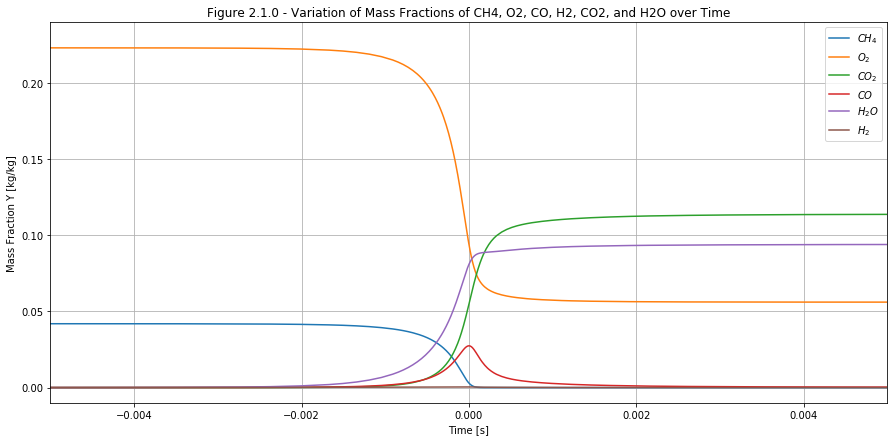


The second plot below is a zoom in for the time evolution of the H2 mass fraction on the new time scale, as it is too small to view under the previous plots scale:



(-0.001, 0.002)

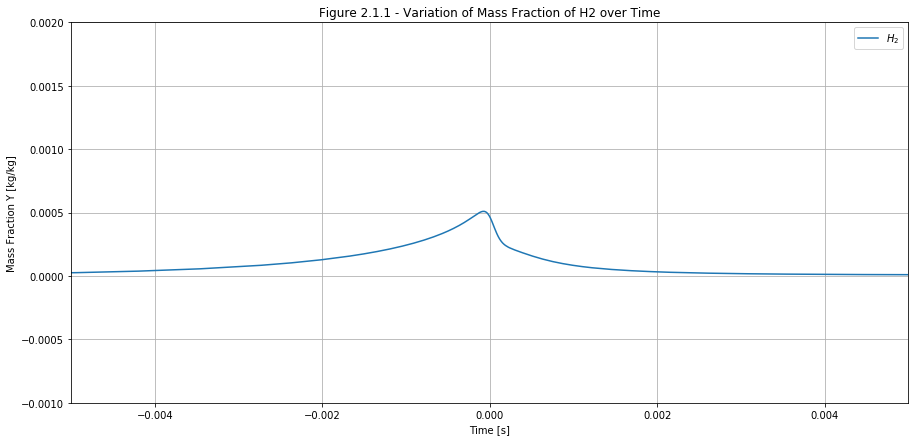

In [178]:
# Extract Mass Fraction data
Y_CH4 = flame.Y[13]
Y_CO2 = flame.Y[15]
Y_CO = flame.Y[14]
Y_H2O = flame.Y[5]
Y_O2  = flame.Y[3]
Y_H2 = flame.Y[0]

        
# Plot
fig2_1 = plt.figure(figsize=(15,7))
plt.plot(ti, Y_CH4, label=r'$CH_{4}$')
plt.plot(ti, Y_O2, label=r'$O_2$')
plt.plot(ti, Y_CO2, label=r'$CO_{2}$')
plt.plot(ti, Y_CO, label=r'$CO$')
plt.plot(ti, Y_H2O, label=r'$H_{2}O$')
plt.plot(ti, Y_H2, label=r'$H_{2}$')
plt.grid(True)
fig2_1.set_tight_layout(False)

plt.title('Figure 2.1.0 - Variation of Mass Fractions of CH4, O2, CO, H2, CO2, and H2O over Time')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction Y [kg/kg]')
plt.legend(loc=1)
plt.xlim([-0.005, 0.005])
plt.ylim([-0.01, 0.24]) #0.24 for y
print('\nThe time evolution of the mass fractions of CH4, O2, CO, H2, CO2, and H2O is plotted below (on the new time scale):\n')

plt.show()
print('\nThe second plot below is a zoom in for the time evolution of the H2 mass fraction on the new time scale, as it is too small to view under the previous plots scale:\n')

fig2_1_2 = plt.figure(figsize=(15,7))
plt.plot(ti, Y_H2, label=r'$H_{2}$')
plt.grid(True)
fig2_1_2.set_tight_layout(False)
plt.title('Figure 2.1.1 - Variation of Mass Fraction of H2 over Time')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction Y [kg/kg]')
plt.legend(loc=1)
plt.xlim([-0.005, 0.005])
plt.ylim([-0.001, 0.002])


The time evolution of temperature and heat release is plotted below (on the new time scale):



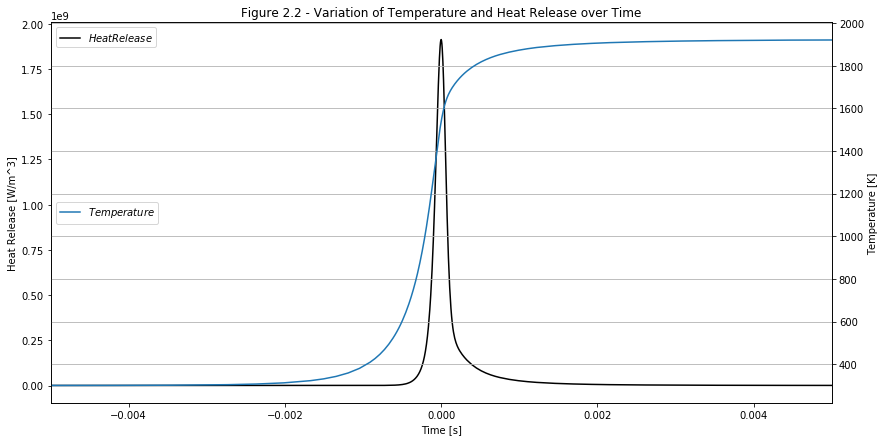

In [179]:
# Temperature and Heat Release Data
T = flame.T
Heat = flame.heat_release_rate
        
# Plot
fig2_2, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
ax2.plot(ti, T, label=r'$Temperature$')
ax1.plot(ti, Heat, label=r'$Heat Release$', color='black')

plt.title('Figure 2.2 - Variation of Temperature and Heat Release over Time')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Heat Release [W/m^3]')
ax2.set_ylabel('Temperature [K]')
ax1.legend(['$Heat Release$'],loc=2)
ax2.legend(loc=6)
ax1.legend(loc=2)
plt.grid(True)
fig2_2.set_tight_layout(False)

plt.xlim(xmin=-0.005,xmax=0.005)
plt.grid(True)

print('\nThe time evolution of temperature and heat release is plotted below (on the new time scale):\n')


<br>
<a id='Section2_1_3'><a>

### 2.1.3 - Time Evolution of Reaction Rates

<br>



The time evolution of reaction rate for CH4, O2, CO, H2, CO2, and H2O is plotted below (on the new time scale):



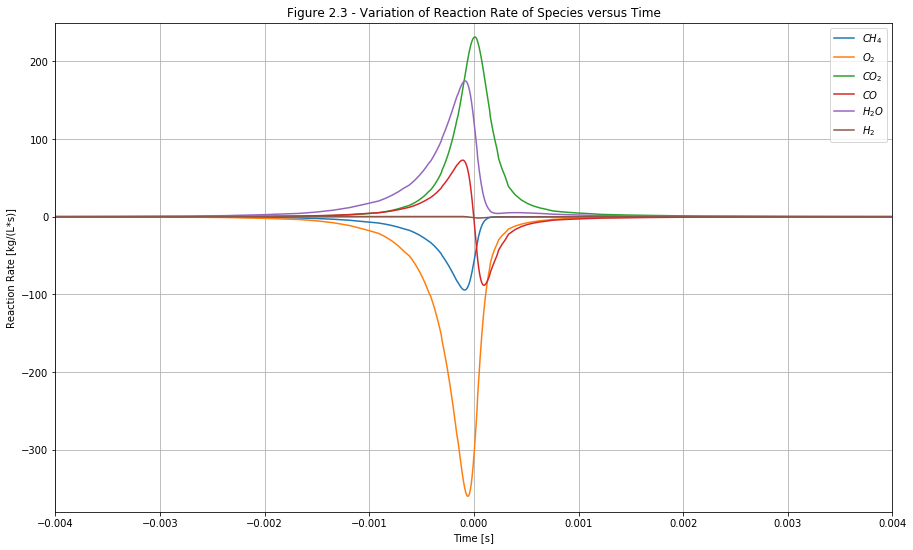


 The plot above is zoomed in close to the region of maximum heat release in order to better view the structure of the flame:



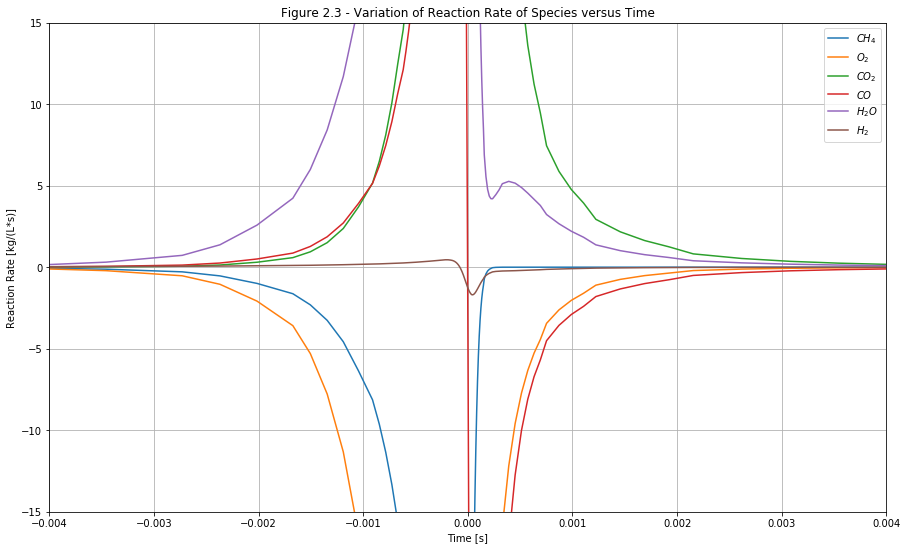

In [180]:
# Initialize Parameters

newgrid = len(flame_grid)

Reactionrate_CH4 = np.zeros(newgrid)
Reactionrate_CO2 = np.zeros(newgrid)
Reactionrate_H2O = np.zeros(newgrid)
Reactionrate_O2 = np.zeros(newgrid)
Reactionrate_CO = np.zeros(newgrid)
Reactionrate_H2 = np.zeros(newgrid)

i=0
for i in range (newgrid-1):
    Reactionrate_CH4[i] = (Y_CH4[i+1]-Y_CH4[i])/(ti[i+1]-ti[i])
    Reactionrate_CO2[i] = (Y_CO2[i+1]-Y_CO2[i])/(ti[i+1]-ti[i])
    Reactionrate_H2O[i] = (Y_H2O[i+1]-Y_H2O[i])/(ti[i+1]-ti[i])
    Reactionrate_O2[i] = (Y_O2[i+1]-Y_O2[i])/(ti[i+1]-ti[i])
    Reactionrate_CO[i] = (Y_CO[i+1]-Y_CO[i])/(ti[i+1]-ti[i])
    Reactionrate_H2[i] = (Y_H2[i+1]-Y_H2[i])/(ti[i+1]-ti[i])
    
fig2_3 = plt.figure(figsize=(15,9))
plt.title('Figure 2.3 - Variation of Reaction Rate of Species versus Time')
plt.xlabel('Time [s]')
plt.ylabel('Reaction Rate [kg/(L*s)]')
plt.plot(ti, Reactionrate_CH4, label=r'$CH_{4}$')
plt.plot(ti, Reactionrate_O2, label=r'$O_2$')
plt.plot(ti, Reactionrate_CO2, label=r'$CO_{2}$')
plt.plot(ti, Reactionrate_CO, label=r'$CO$')
plt.plot(ti, Reactionrate_H2O, label=r'$H_{2}O$')
plt.plot(ti, Reactionrate_H2, label=r'$H_{2}$')
plt.legend(loc=1)
plt.xlim([-0.004,0.004])
plt.ylim([-380,250])
plt.grid(True)
fig2_3.set_tight_layout(False)
print('\nThe time evolution of reaction rate for CH4, O2, CO, H2, CO2, and H2O is plotted below (on the new time scale):\n')

plt.show()

print('\n The plot above is zoomed in close to the region of maximum heat release in order to better view the structure of the flame:\n')
fig2_3_2 = plt.figure(figsize=(15,9))
plt.title('Figure 2.3 - Variation of Reaction Rate of Species versus Time')
plt.xlabel('Time [s]')
plt.ylabel('Reaction Rate [kg/(L*s)]')
plt.plot(ti, Reactionrate_CH4, label=r'$CH_{4}$')
plt.plot(ti, Reactionrate_O2, label=r'$O_2$')
plt.plot(ti, Reactionrate_CO2, label=r'$CO_{2}$')
plt.plot(ti, Reactionrate_CO, label=r'$CO$')
plt.plot(ti, Reactionrate_H2O, label=r'$H_{2}O$')
plt.plot(ti, Reactionrate_H2, label=r'$H_{2}$')
plt.legend(loc=1)
plt.xlim([-0.004,0.004])
plt.ylim([-15,15])
plt.grid(True)
fig2_3_2.set_tight_layout(False)

<br>

### Discussion of the 3 Plots:


Figure 2.1.0 shows that the mass fractions of $CH_4$ and $O_2$ both decrease from their initial values together in a similar way, then stabilize at around 0 and 0.06 respectively as time progresses. With a lean equivalence ratio of 0.75, the fuel-air mixture is fuel lean. As the reaction progresses, both the fuel and oxidizer are consumed and by the time the flame releases the greatest amount of heat, the fuel is completely consumed and the level of $O_2$ in the system equilibrates without being completely consumed, as is to be expected in a fuel-lean mixture.


As the fuel is consumed the mass fraction of $CO_2$ rises, with the two events overlapping. This is in line with the sequence,
$$CH_4 \rightarrow CO \rightarrow CO_2$$
whereby the the fuel, $CH_4$ is destroyed, creating $CO$ which then oxidizes to create $CO_2$. The production of $CO_2$ begins before all of the $CH_4$ has transitioned to $CO$, which is why the two processes overlap.

$H_2O$ derived from intermediate species $HO_2, H_2O_2$ and $H$ radiacals, is produced as the fuel-air mixture is consumed. $H_2O$ attains its peak concentration faster than $CO_2$ as the energy requirements to dissociate the bonds involved in $H_2O$ production are lower.

The flame begins to release heat a short time after the consumption of $CH_4$ and $O_2$. The time delay between the onset of the consumption of the fuel-air mixture and the start of heat production is attributed to the ignition delay time of the combustion reaction. The flame ceases to release heat when the concentration of $CO_2$ reaches its maximum and plateaus. This is expected as the dissipation of $CO$, the intermediate species between $CH_4$ and $CO_2$, to produce $CO_2$ according to the reaction below leads to burnout.
$$CO+OH \rightarrow CO_2+H$$

With regard to $H_2$ we see that slightly before the time of maximum temperature, $H_2$ production peaks and is then consumed and plateaus at roughly the same time as $CO_2$, $O_2$ and $H_2O$. $H_2$ production is acheived through several intermedite reactions namely the breakdown of methane to methyl radical, which is subsequently consumed by O atoms in the following reaction:

$$CH_3+O \rightarrow CH_2O+H$$

Upon further abstraction of $CH_2O$ hydrogen is produced:

$$CH_2O+H \rightarrow HCO+H_2$$


<br>
<a id='Section2_1_4'><a>

### 2.1.4 - Repeating Simulation for Different Equivalence Ratios

<br>

The simulation will be repeated for $\phi\,=\,$ 0.600, 0.625, 0.650, 0.675, and 0.700.

The mass fractions of $NO$ and $CO$, as well as the adiabatic flame temperature $T_{ad}$, will be extracted and plotted versus time.

In [181]:
# Initialize phi values
phi = np.array([0.600, 0.625, 0.650, 0.675, 0.700])
HeatRelease = np.zeros((len(phi),len(flame_grid)))
MaxHeatRelease = np.zeros((len(phi),1))
i0 = np.zeros((len(phi),1))
t0 = np.zeros((len(phi),1))
t = np.zeros((len(phi),len(flame_grid)))
ti = np.zeros((len(phi),len(flame_grid)))
NO = np.zeros((len(phi),len(flame_grid)))
CO = np.zeros((len(phi),len(flame_grid)))
Tad = np.zeros((len(phi),len(flame_grid)))

#print(HeatRelease)

for k in range(len(phi)):
    
    To = 300        # K
    Po = 101325     # Pa
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi[k]
    width = 0.014
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    flame_velocity = flame.u
    flame_grid = flame.grid
    i = 0

    if phi[k]==0.600:  
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t1, ti1, i01, t01, HeatRelease1, MaxHeatRelease1] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T1 = flame.T
        NO1 = flame.Y[35]
        CO1 = flame.Y[14]
        i = 0
        Data1 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i01: Data1[0,i]=0
            else: Data1[0,i] = t1[i] - t01
            Data1[1,i]=HeatRelease1[i]
            Data1[2,i]=NO1[i]
            Data1[3,i]=CO1[i]
            Data1[4,i]=T1[i]
        print(Data1)
        
    if phi[k]==0.625:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t2, ti2, i02, t02, HeatRelease2, MaxHeatRelease2] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T2 = flame.T
        NO2 = flame.Y[35]
        CO2 = flame.Y[14]
        i = 0
        Data2 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i02: Data2[0,i]=0
            else: Data2[0,i] = t2[i] - t02
            Data2[1,i]=HeatRelease2[i]
            Data2[2,i]=NO2[i]
            Data2[3,i]=CO2[i]
            Data2[4,i]=T2[i]

    if phi[k]==0.650:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t3, ti3, i03, t03, HeatRelease3, MaxHeatRelease3] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T3 = flame.T
        NO3 = flame.Y[35]
        CO3 = flame.Y[14]
        i = 0
        Data3 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i03: Data3[0,i]=0
            else: Data3[0,i] = t3[i] - t03
            Data3[1,i]=HeatRelease3[i]
            Data3[2,i]=NO3[i]
            Data3[3,i]=CO3[i]
            Data3[4,i]=T3[i]
            
    if phi[k]==0.675:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t4, ti4, i04, t04, HeatRelease4, MaxHeatRelease4] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T4 = flame.T
        NO4 = flame.Y[35]
        CO4 = flame.Y[14]
        i = 0
        Data4 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i04: Data4[0,i]=0
            else: Data4[0,i] = t4[i] - t04
            Data4[1,i]=HeatRelease4[i]
            Data4[2,i]=NO4[i]
            Data4[3,i]=CO4[i]
            Data4[4,i]=T4[i]
            
    if phi[k]==0.700:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t5, ti5, i05, t05, HeatRelease5, MaxHeatRelease5] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T5 = flame.T
        NO5 = flame.Y[35]
        CO5 = flame.Y[14]
        i = 0
        Data5 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i05: Data5[0,i]=0
            else: Data5[0,i] = t5[i] - t05
            Data5[1,i]=HeatRelease5[i]
            Data5[2,i]=NO5[i]
            Data5[3,i]=CO5[i]
            Data5[4,i]=T5[i]
            


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139      4.171
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002919      3.982
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04988      2.297
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
######################


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.594e-05      4.201
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001946      4.099
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02217      2.767
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCN HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
#############

Take 10 timesteps     8.543e-05      4.401
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.561e-05       6.16
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002598      4.696
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002219      4.126
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.703e-05       5.94
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009491      4.091
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01622      2.988
Attempt Newton solution of steady-state problem...    success.

Problem solved on [17] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..........................

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139      5.491
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.123e-05      5.475
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001559      3.745
Attempt Newton solution of steady-state problem...    success.

Problem solved on [27] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 6 7 8 9 10 11 12 13 14 15 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

.......................................................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [38] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 4 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 4 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [53] point grid(s).

..............................................................................
##############################################################################
Refining gr

In [182]:
print('\n\n- Phi = 0.600:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease1)
print('     It occurs at time t0 = %5.6f s' %t01)

print('\n- Phi = 0.625:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease2)
print('     It occurs at time t0 = %5.6f s' %t02)

print('\n- Phi = 0.650:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease3)
print('     It occurs at time t0 = %5.6f s' %t03)

print('\n- Phi = 0.675:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease4)
print('     It occurs at time t0 = %5.6f s' %t04)

print('\n- Phi = 0.700:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease5)
print('     It occurs at time t0 = %5.6f s\n' %t05)



- Phi = 0.600:
     The max heat release value is 5.54e+08  [W/m^3]
     It occurs at time t0 = 0.083869 s

- Phi = 0.625:
     The max heat release value is 7.23e+08  [W/m^3]
     It occurs at time t0 = 0.071741 s

- Phi = 0.650:
     The max heat release value is 9.16e+08  [W/m^3]
     It occurs at time t0 = 0.062638 s

- Phi = 0.675:
     The max heat release value is 1.14e+09  [W/m^3]
     It occurs at time t0 = 0.055400 s

- Phi = 0.700:
     The max heat release value is 1.38e+09  [W/m^3]
     It occurs at time t0 = 0.049734 s



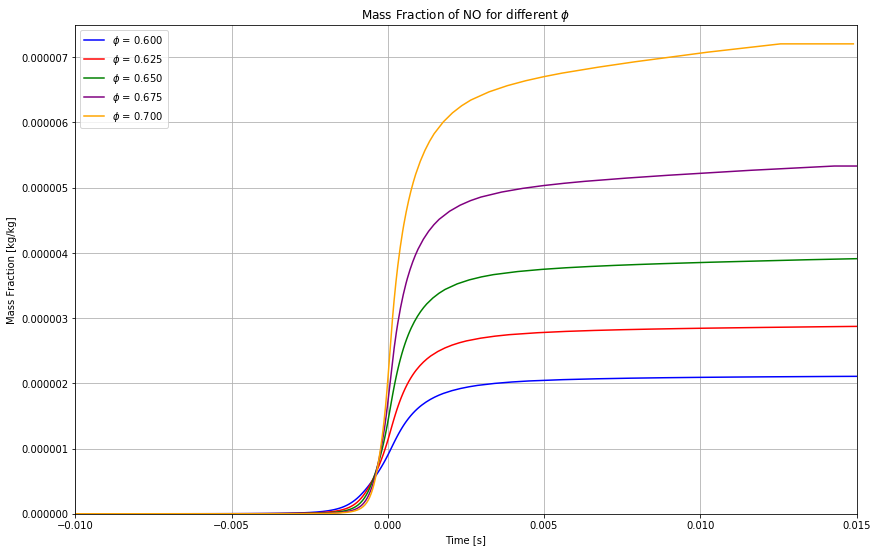

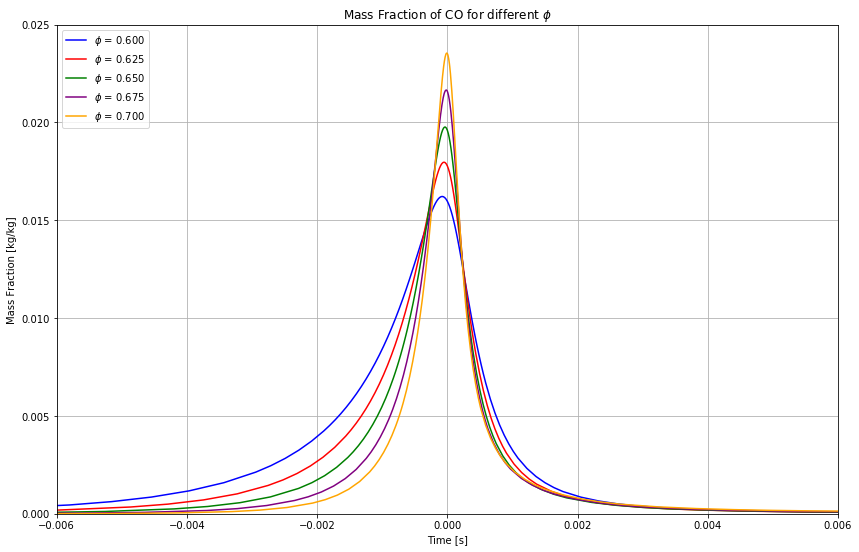

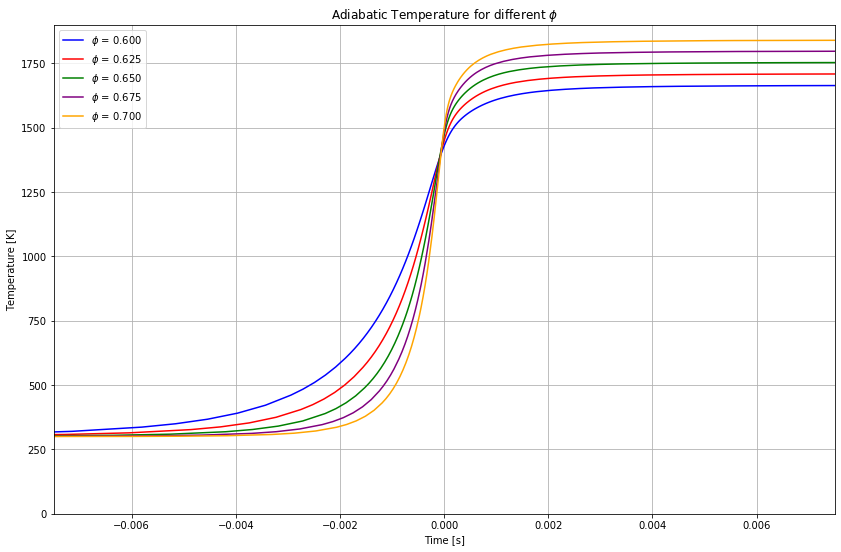

In [195]:
fig = plt.figure(figsize=(14,9))
plt.plot(Data1[0,:], Data1[2,:], color='blue', label=r'$\phi$ = 0.600')
plt.plot(Data2[0,:], Data2[2,:], color='red', label=r'$\phi$ = 0.625')
plt.plot(Data3[0,:], Data3[2,:], color='green', label=r'$\phi$ = 0.650')
plt.plot(Data4[0,:], Data4[2,:], color='purple', label=r'$\phi$ = 0.675')
plt.plot(Data5[0,:], Data5[2,:], color='orange', label=r'$\phi$ = 0.700')
plt.title('Mass Fraction of NO for different $\phi$')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction [kg/kg]')
plt.legend(loc=2)
plt.xlim([-0.01, 0.015])
plt.ylim([0,0.0000075])
plt.grid(True)

fig= plt.figure(figsize=(14,9))
plt.plot(Data1[0,:], Data1[3,:], color='blue', label=r'$\phi$ = 0.600')
plt.plot(Data2[0,:], Data2[3,:], color='red', label=r'$\phi$ = 0.625')
plt.plot(Data3[0,:], Data3[3,:], color='green', label=r'$\phi$ = 0.650')
plt.plot(Data4[0,:], Data4[3,:], color='purple', label=r'$\phi$ = 0.675')
plt.plot(Data5[0,:], Data5[3,:], color='orange', label=r'$\phi$ = 0.700')
plt.title('Mass Fraction of CO for different $\phi$')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction [kg/kg]')
plt.legend(loc=2)
plt.xlim([-0.006, 0.006])
plt.ylim([0,0.025])
plt.grid(True)


fig= plt.figure(figsize=(14,9))
plt.plot(Data1[0,:], Data1[4,:], color='blue', label=r'$\phi$ = 0.600')
plt.plot(Data2[0,:], Data2[4,:], color='red', label=r'$\phi$ = 0.625')
plt.plot(Data3[0,:], Data3[4,:], color='green', label=r'$\phi$ = 0.650')
plt.plot(Data4[0,:], Data4[4,:], color='purple', label=r'$\phi$ = 0.675')
plt.plot(Data5[0,:], Data5[4,:], color='orange', label=r'$\phi$ = 0.700')
plt.title('Adiabatic Temperature for different $\phi$')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend(loc=2)
plt.xlim([-0.0075, 0.0075])
plt.ylim([0,1900])
plt.grid(True)

<br>

### Discussion of Results:



As shown in the above figures, for temperature variation, it is shown that for higher phi values, the maximum heat released by the flame is greater. This is to be expected as the adiabatic flame temperature, the maximum temperature achieved by the flame, occurs at a slightly rich equivalence ratio. As such, the closer the equivalence ratio to stoichiometric, the greater the amount of heat released.

The peak $CO$ and $NO$ emissions are largest for the highest equivalence ratio. 

This is expected since, as phi increases, the mass fraction of $CH_4$ increases, which disassociates into $CO$ and, eventually, $CO_2$. Furthermore, $CO$ is an intermediate species:
$$CH_4 \rightarrow CO \rightarrow CO_2$$

As for $NO$ emissions, they continue increasing well past the maximum heat release point but flatten out as time progresses.  Higher $NO$ emissions for higher phi values are expected because the higher the equivalence ratio, the greater the flame temperature and the mechanism required to produce $NO$, as explained by Zeldovich mechanisms.



<br>
<a id='Section2_2'><a>
<br>

## 2.2 - Effect of Equivalence Ratio and Dilutents on Flame Speed

<br>

In this section, the laminar flame speed ($\,S_L\,$) will be computed for different equivalence ratios and different dilutents, and the obtained results will be compared
<br>

<a id='Section2_2_1'><a>

### 2.2.1 - Calculating Laminar Flame Speed for Varying Equivalence Ratios

<br>

For $T_{ini} \,=\, 300\,K$ and $P_{ini} \,=\, 1\,atm$, the laminar flame speed ($\,S_L\,$) will be calculated as function of the equivalence ratio $\,\phi\,$ between $0.5$ and $1.4$.

<br>

In [196]:
# Initialize Parameters
To = 300        # K
Po = 101325     # Pa
phi = np.linspace(0.5,1.4,10)
SL = np.zeros(len(phi))

for k in range(len(phi)):
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi[k]
    width = 0.014
    #Initial grids, chosen to be 0.02cm long : 
    #Refined grid at inlet and outlet, 6 points in x-direction :
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3 # m
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    SL[k] = flame.u[0]


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      3.225
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006568      3.204
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02806      2.184
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.4794     0.3481
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H6 CH2 CH2CO CH2O CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2

Attempt Newton solution of steady-state problem...    success.

Problem solved on [91] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 53 54 55 56 57 58 59 60 61 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCO HO2 N2 O O2 OH T point 54 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [101] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after gr

Take 10 timesteps     0.0007794      4.016
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02996      2.553
Attempt Newton solution of steady-state problem...    success.

Problem solved on [33] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 18 point 9 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001281      5.359
Attempt Newton solution of steady-state problem..

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139      5.491
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001081      5.244
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002771      3.544
Attempt Newton solution of steady-state problem...    success.

Problem solved on [34] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 10 point 19 point 3 u 
##############################################################################

..................

Take 10 timesteps     4.271e-05      4.497
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.52e-05      6.726
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001299      5.356
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003329       3.61
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.05688      2.263
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.4319     0.9571
Attempt Newton solution of steady-state problem...    success.

Problem solved on [23] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state problem...    

Take 10 timesteps     2.136e-05       4.41
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005474      3.497
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01403       3.05
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1065      1.745
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps          2.73    -0.6655
Attempt Newton solution of steady-state problem...    success.

Problem solved on [13] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.08 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 1 2 3 4 5 6 7 8 9 10 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCN HCNO HCO HNCO HO2 HOCN N2 N2O NCO NO NO2 O O2 OH T point 2 point 3 poi

Attempt Newton solution of steady-state problem...    success.

Problem solved on [159] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      4.629
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005474      3.501
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01403      2.767
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.2397     0.7356
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.04 m
################################

Attempt Newton solution of steady-state problem...    success.

Problem solved on [97] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO H H2 H2O H2O2 HCCO HCCOH HCN HCO HO2 N2 NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [125] point grid(s).

..............................................................................
##################################################################

Attempt Newton solution of steady-state problem...    success.

Problem solved on [75] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 54 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N N2 NCO NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [95] point grid(s).

..............................................................................
####################################################################

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      4.652
Attempt Newton solution of steady-state problem...    success.

Problem solved on [61] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 13 22 23 24 25 26 27 28 29 30 31 32 33 34 35 42 43 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N N2 NCO NH NH2 NH3 NO NO2 O O2 OH T point 13 point 42 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [78] point grid(s).

.................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [47] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 12 point 29 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [66] point grid(s).

..............................................................................
##########################

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.063e-05      5.508
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004325      5.079
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003079       5.32
Attempt Newton solution of steady-state problem...    success.

Problem solved on [50] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 41 42 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N N2 NCO NH NH2 NH3 NO NO2 O O2 OH T point 14 point 31 u 
#####################################################

In [198]:
print('\nWith 76.7% N2 in the air:\n')
for i in range(len(phi)):
    print('At phi = %5.2f, the laminar flame speed is :  %5.5f cm/s'%(phi[i],SL[i]*100))


With 76.7% N2 in the air:

At phi =  0.50, the laminar flame speed is :  4.94676 cm/s
At phi =  0.60, the laminar flame speed is :  11.61201 cm/s
At phi =  0.70, the laminar flame speed is :  19.58150 cm/s
At phi =  0.80, the laminar flame speed is :  27.55268 cm/s
At phi =  0.90, the laminar flame speed is :  34.19342 cm/s
At phi =  1.00, the laminar flame speed is :  38.32089 cm/s
At phi =  1.10, the laminar flame speed is :  38.64362 cm/s
At phi =  1.20, the laminar flame speed is :  33.89593 cm/s
At phi =  1.30, the laminar flame speed is :  23.94389 cm/s
At phi =  1.40, the laminar flame speed is :  14.03044 cm/s


<br>
<a id='Section2_2_1'><a>

### 2.2.2 - Calculating Laminar Flame Speed for Varying Equivalence Ratios with CO2 instead of N2

<br>

The simulation in Section 2.2.1 will be repeated but replacing N2 in the air with CO2.

Both sets of results will then be plotted on the same graph and compared.

<br>

In [199]:
# Initialize Parameters
To = 300        # K
Po = 101325     # Pa
phi = np.linspace(0.5,1.4,10)
SL_CO2 = np.zeros(len(phi))

for k in range(len(phi)):
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, CO2:7.52'%phi[k]
    width = 0.4
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    SL_CO2[k] = flame.u[0]


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      1.747
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      1.677
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1683      1.168
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         4.314     0.5673
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         73.72    -0.7966
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.8 m
##############################################################################
Refining grid in flame.
    New points inserted after grid p

Attempt Newton solution of steady-state problem...    success.

Problem solved on [88] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 51 52 53 54 
    to resolve C2H4 C2H6 CH2CO CH2O CH3 CH3OH CH4 CO H2 H2O H2O2 HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [107] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 38 39 40 41 42 43 44 45 46 47 48 49 
    to re

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00711      2.835
Attempt Newton solution of steady-state problem...    success.

Problem solved on [22] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 6 7 8 9 10 11 12 
    to resolve C2H2 C2H4 C2H6 CH2CO CH2O CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [29] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
  

Take 10 timesteps      0.001559      3.891
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00148      3.869
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03792      1.704
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1215      1.593
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004054      3.961
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001804      5.291
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003082      2.883
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1185      2.188
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01054      3.753
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002085      

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.205
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004379      3.272
Attempt Newton solution of steady-state problem...    success.

Problem solved on [34] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 11 12 13 14 15 16 17 18 19 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563       4.04
Attempt Newto

Take 10 timesteps     3.849e-05      5.283
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009864      4.247
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02528      2.319
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006749      3.391
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.507e-05      5.452
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001924      3.909
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04931      2.369
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.005851      3.568
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001543      5.342
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004393      

Attempt Newton solution of steady-state problem...    success.

Problem solved on [93] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [113] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points 

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.199
Attempt Newton solution of steady-state problem...    success.

Problem solved on [40] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 17 18 19 20 21 22 23 24 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      4.038
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.842e-05      5.384
Attempt Newton s

Take 10 timesteps      0.002497      3.107
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.06399      1.725
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01281      3.151
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      5.63e-05      5.275
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0006413      3.985
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01096      2.333
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04681      2.697
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009256      4.834
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002471      4.864
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002815      

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563       4.37
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      2.228
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1683      1.503
Attempt Newton solution of steady-state problem...    success.

Problem solved on [77] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T u 
##############################################################################

..............................................................

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.9101     0.5353
Attempt Newton solution of steady-state problem...    success.

Problem solved on [33] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 6 11 12 13 14 15 16 17 18 19 23 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T point 23 point 6 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      4.192
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006568   

In [200]:
print('\nWith 76.7% CO2 in the air instead of N2:\n')
for i in range(len(phi)):
    print('At phi = %5.2f, the laminar flame speed is :  %5.5f cm/s'%(phi[i],SL_CO2[i]*100))


With 76.7% CO2 in the air instead of N2:

At phi =  0.50, the laminar flame speed is :  0.25849 cm/s
At phi =  0.60, the laminar flame speed is :  0.74543 cm/s
At phi =  0.70, the laminar flame speed is :  1.49247 cm/s
At phi =  0.80, the laminar flame speed is :  2.42614 cm/s
At phi =  0.90, the laminar flame speed is :  3.24917 cm/s
At phi =  1.00, the laminar flame speed is :  3.57287 cm/s
At phi =  1.10, the laminar flame speed is :  3.21913 cm/s
At phi =  1.20, the laminar flame speed is :  2.25356 cm/s
At phi =  1.30, the laminar flame speed is :  1.41587 cm/s
At phi =  1.40, the laminar flame speed is :  1.17195 cm/s


<br>

These two sets of results are plotted on the same graph below:

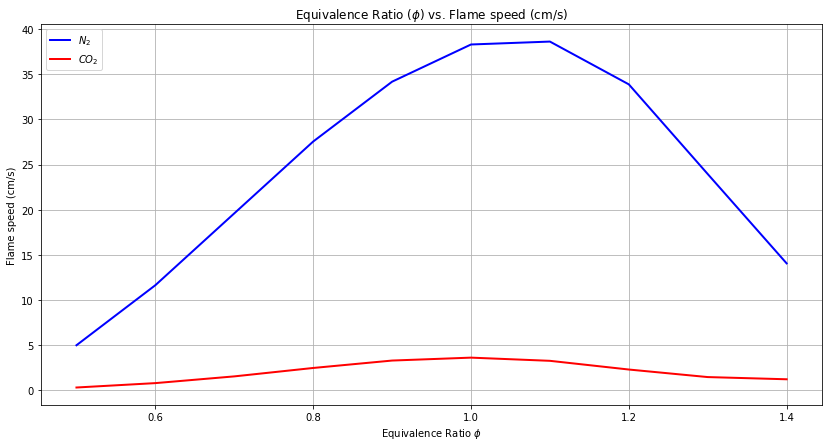

In [201]:
fig = plt.figure(figsize=(14,7))
plt.plot(phi, SL*100, label ='$N_2$',lw=2,color='blue')
plt.plot(phi, SL_CO2*100, label ='$CO_2$',lw=2,color='red')
plt.legend(loc=2);
plt.xlabel('Equivalence Ratio $\phi$')
plt.ylabel('Flame speed (cm/s)')
plt.grid(True)
plt.title('Equivalence Ratio ($\phi$) vs. Flame speed (cm/s)');


<br>

#### Discussion:


<br>

The above figure shows that laminar flame speed reaches a maximum for $N_2$ and $CO_2$ around stoichiometry. The flame speed of $N_2$ is  greater than $CO_2$. This is because in premixed flames, the fuel is burnt up in the reaction zone which creates intermediate species. Afterwards, these intermediate species recombine in reactions that are much slower. As a result, flame speed slows down until burnout occurs. In addition to this, $CO_2$ is a 3-atom molecule, it has more modes of vibration as compared to $N_2$, therefore it can absorb more energy. Thus less energy goes into increasing the flame speed.

The equivalence ratio, which has influence on temperature, also affects flame speed, as shown below:

$$S_L \propto \tilde{T}^{\space 0.375}T_uT_b^{\space\frac{-n}{2}}exp\bigg(\frac{-E_A}{2R_uT_b}\bigg)P^{\space\frac{n-2}{2}}$$

Moreover, adiabatic flame temperature is known to increase with equivalence ratio in lean mixtures, reach a maximum just past 1, and decline thereafter. This is identical to the trend observed when comparing laminar flame speed to equivalence ratio.

<br>

<br>
<a id='Section2_3'><a>

## 2.3 - Effect of Pressure on Flame Speed, Flame Thickness, and Emissions of NO-CO

<br>

In this section, the laminar flame speed ($\,S_L\,$) and the flame thickness ($\,\delta_D\,$) will be computed and plotted for different initial pressure values. The NO and CO concentrations will also be studied, and the obtained results will be compared and explained.


<a id='Section2_3_1'><a>

### 2.3.1 - Calculating Laminar Flame Speed for Varying Initial Pressures
<br>

For $T_{ini} \,=\, 600\,K$ and $\phi \,=\, 0.6$, the laminar flame speed ($\,S_L\,$) will be calculated as function of initial pressures $\,P_{ini}\,$ between $1$ and $16$ atm. 

<br>

In [202]:
# Initialize Parameters
To = 600        # K
Po = np.array([1.0, 2.0, 4.0, 8.0, 16.0])    # atm
SL = np.zeros(len(Po))

for k in range(len(Po)):
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po[k]*ct.one_atm, 'CH4:0.6, O2:2, N2:7.52'
    width = 0.014
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    SL[k] = flame.u[0]


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.695e-05      4.689
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009731      4.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.247e-05      6.451
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      4.523
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH

Take 10 timesteps      0.001642      4.141
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001169      4.488
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.463e-05      6.628
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000125      4.714
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003203      3.609
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.08209     -1.169
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3

Attempt Newton solution of steady-state problem...    success.

Problem solved on [124] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      3.998
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004105      3.982
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01052      3.287
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.778e-05      5.517
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.041e-05      6.652
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002

Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2OH CH3 CH3CHO CH3O CH3OH CO H H2 H2O2 HCCO HCO HO2 O OH 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [126] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [80] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 N2O NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [98] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    

Attempt Newton solution of steady-state problem...    success.

Problem solved on [54] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 19 20 21 22 23 24 25 26 27 28 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [64] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New poi



At P0 =  1.00, the laminar flame speed is :  64.57489 cm/s
At P0 =  2.00, the laminar flame speed is :  46.71757 cm/s
At P0 =  4.00, the laminar flame speed is :  32.13752 cm/s
At P0 =  8.00, the laminar flame speed is :  21.40576 cm/s
At P0 = 16.00, the laminar flame speed is :  14.67847 cm/s


The plot of laminar flame speed versus initial pressure is given below:



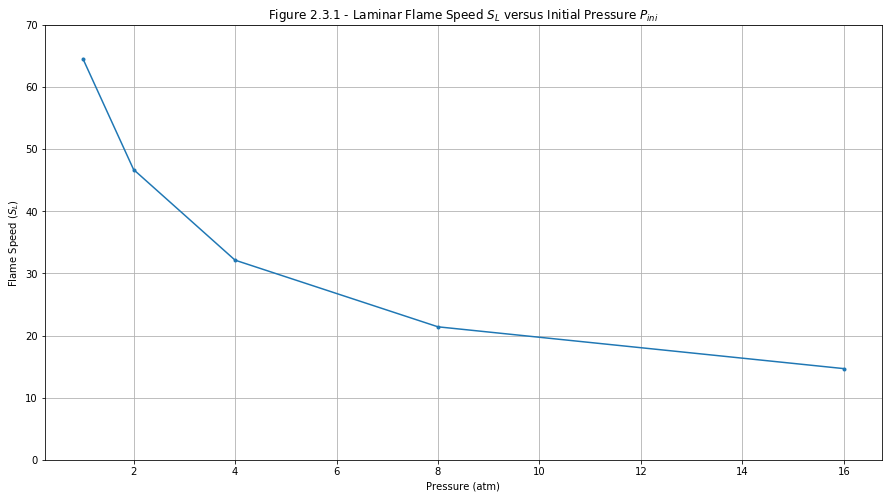

In [205]:
print('\n')
for i in range(len(Po)):
    print('At P0 = %5.2f, the laminar flame speed is :  %5.5f cm/s'%(Po[i],SL[i]*100))
    
print('\n\nThe plot of laminar flame speed versus initial pressure is given below:\n')
fig = plt.figure(figsize=(15,8))
plt.plot(Po, SL*100,'.-')

plt.title('Figure 2.3.1 - Laminar Flame Speed $S_L$ versus Initial Pressure $P_{ini}$')
plt.xlabel('Pressure (atm)')
plt.ylabel('Flame Speed ($S_L$)')
plt.ylim([0,70])
plt.grid(True)

#### Discussion:


<br>

As pressure increases, laminar flame speed decreases. This is because the pressure change impacts the density and as a result the flame expansion is decreased, so speed decreases.
<br>

<a id='Section2_3_2'><a>

### 2.3.2 - NO and CO Concentrations for Varying Initial Pressures
<br>

For $T_{ini} \,=\, 600\,K$ and $\phi \,=\, 0.6$, the concentrations of $NO$ and $CO$ will be calculated as function of initial pressures $\,P_{ini}\,$ between $1$ and $16$ atm. 

<br>

In [206]:
# Initialize Parameters
To = 600        # K
Po = np.array([1.0, 2.0, 4.0, 8.0, 16.0])    # atm
SL = np.zeros(len(Po))

for k in range(len(Po)):
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po[k]*ct.one_atm, 'CH4:0.6, O2:2, N2:7.52'
    width = 0.014
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    SL[k] = flame.u[0]


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.695e-05      4.689
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009731      4.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.247e-05      6.451
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      4.523
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH

Take 10 timesteps     6.407e-05      4.295
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642      4.141
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001169      4.488
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.463e-05      6.628
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000125      4.714
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003203      3.609
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.08209     -1.169
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 

Attempt Newton solution of steady-state problem...    success.

Problem solved on [124] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      3.998
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004105      3.982
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01052      3.287
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.778e-05      5.517
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.041e-05      6.652
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002

Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2OH CH3 CH3CHO CH3O CH3OH CO H H2 H2O2 HCCO HCO HO2 O OH 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [126] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [80] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 N2O NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [98] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    

Attempt Newton solution of steady-state problem...    success.

Problem solved on [54] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 19 20 21 22 23 24 25 26 27 28 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [64] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New poi

In [207]:
# Initialize Parameters
To = 600        # K
Po = np.array([1.0, 2.0, 4.0, 8.0, 16.0])    # atm
HeatRelease = np.zeros((len(phi),len(flame_grid)))
MaxHeatRelease = np.zeros((len(phi),1))
i0 = np.zeros((len(phi),1))
t0 = np.zeros((len(phi),1))
t = np.zeros((len(phi),len(flame_grid)))
ti = np.zeros((len(phi),len(flame_grid)))
NO = np.zeros((len(phi),len(flame_grid)))
CO = np.zeros((len(phi),len(flame_grid)))
Tad = np.zeros((len(phi),len(flame_grid)))

#print(HeatRelease)

for k in range(len(Po)):
    
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po[k]*ct.one_atm, 'CH4:0.6, O2:2, N2:7.52'
    width = 0.014
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    flame_velocity = flame.u
    flame_grid = flame.grid
    i = 0

    if Po[k]==1.0:  
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t1, ti1, i01, t01, HeatRelease1, MaxHeatRelease1] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T1 = flame.T
        NO1 = flame.Y[35]
        CO1 = flame.Y[14]
        i = 0
        Data1 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i01: Data1[0,i]=0
            else: Data1[0,i] = t1[i] - t01
            Data1[1,i]=HeatRelease1[i]
            Data1[2,i]=NO1[i]
            Data1[3,i]=CO1[i]
            Data1[4,i]=T1[i]
        print(Data1)
        
    if Po[k]==2.0:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t2, ti2, i02, t02, HeatRelease2, MaxHeatRelease2] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T2 = flame.T
        NO2 = flame.Y[35]
        CO2 = flame.Y[14]
        i = 0
        Data2 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i02: Data2[0,i]=0
            else: Data2[0,i] = t2[i] - t02
            Data2[1,i]=HeatRelease2[i]
            Data2[2,i]=NO2[i]
            Data2[3,i]=CO2[i]
            Data2[4,i]=T2[i]

    if Po[k]==4.0:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t3, ti3, i03, t03, HeatRelease3, MaxHeatRelease3] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T3 = flame.T
        NO3 = flame.Y[35]
        CO3 = flame.Y[14]
        i = 0
        Data3 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i03: Data3[0,i]=0
            else: Data3[0,i] = t3[i] - t03
            Data3[1,i]=HeatRelease3[i]
            Data3[2,i]=NO3[i]
            Data3[3,i]=CO3[i]
            Data3[4,i]=T3[i]
            
    if Po[k]==8.0:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t4, ti4, i04, t04, HeatRelease4, MaxHeatRelease4] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T4 = flame.T
        NO4 = flame.Y[35]
        CO4 = flame.Y[14]
        i = 0
        Data4 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i04: Data4[0,i]=0
            else: Data4[0,i] = t4[i] - t04
            Data4[1,i]=HeatRelease4[i]
            Data4[2,i]=NO4[i]
            Data4[3,i]=CO4[i]
            Data4[4,i]=T4[i]
            
    if Po[k]==16.0:
        
        # Use the function from Section 2.1.1 to get the desired results for our grid and velocity field
        [t5, ti5, i05, t05, HeatRelease5, MaxHeatRelease5] = spatialscale_to_timescale(flame_grid,flame_velocity)

        # Get the desired range of T, NO, and CO values
        T5 = flame.T
        NO5 = flame.Y[35]
        CO5 = flame.Y[14]
        i = 0
        Data5 = np.zeros((5,len(flame_grid)))
        for i in range(len(flame_grid)):
            if i==i05: Data5[0,i]=0
            else: Data5[0,i] = t5[i] - t05
            Data5[1,i]=HeatRelease5[i]
            Data5[2,i]=NO5[i]
            Data5[3,i]=CO5[i]
            Data5[4,i]=T5[i]


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.695e-05      4.689
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009731      4.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.247e-05      6.451
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      4.523
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      4.295
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642      4.141
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001169      4.488
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.463e-05      6.628
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000125      4.714
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003203      3.609
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.08209     -1.169
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point

Attempt Newton solution of steady-state problem...    success.

Problem solved on [111] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 45 46 47 48 49 50 51 52 53 54 55 56 57 
    to resolve C2H2 C2H5 CH2 CH3 CH3CHO HCO 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [124] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    f

Attempt Newton solution of steady-state problem...    success.

Problem solved on [81] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 79 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 O O2 OH T point 79 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
   

Attempt Newton solution of steady-state problem...    success.

Problem solved on [66] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 21 22 23 24 25 26 27 28 29 30 31 32 33 34 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [80] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.824
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002162      5.501
Attempt Newton solution of steady-state problem...    success.

Problem solved on [46] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 16 17 18 19 20 21 22 23 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [54] p

In [208]:
print('\n\n- Po = 1 atm:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease1)
print('     It occurs at time t0 = %5.6f s' %t01)
print('     Here, Y_NO = %5.8f kg/kg' %NO1[i01])
print('     Here, Y_CO = %5.4f     kg/kg' %CO1[i01])

print('\n- Po = 2 atm:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease2)
print('     It occurs at time t0 = %5.6f s' %t02)
print('     Here, Y_NO = %5.8f kg/kg' %NO2[i02])
print('     Here, Y_CO = %5.4f     kg/kg' %CO2[i02])

print('\n- Po = 4 atm:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease3)
print('     It occurs at time t0 = %5.6f s' %t03)
print('     Here, Y_NO = %5.8f kg/kg' %NO3[i03])
print('     Here, Y_CO = %5.4f     kg/kg' %CO3[i03])

print('\n- Po = 8 atm:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease4)
print('     It occurs at time t0 = %5.6f s' %t04)
print('     Here, Y_NO = %5.8f kg/kg' %NO4[i04])
print('     Here, Y_CO = %5.4f     kg/kg' %CO4[i04])

print('\n- Po = 16 atm:')
print('     The max heat release value is %5.2e  [W/m^3]' %MaxHeatRelease5)
print('     It occurs at time t0 = %5.6f s' %t05)
print('     Here, Y_NO = %5.8f kg/kg' %NO5[i05])
print('     Here, Y_CO = %5.4f     kg/kg\n' %CO5[i05])




- Po = 1 atm:
     The max heat release value is 2.17e+09  [W/m^3]
     It occurs at time t0 = 0.015246 s
     Here, Y_NO = 0.00000141 kg/kg
     Here, Y_CO = 0.0254     kg/kg

- Po = 2 atm:
     The max heat release value is 5.44e+09  [W/m^3]
     It occurs at time t0 = 0.021047 s
     Here, Y_NO = 0.00000185 kg/kg
     Here, Y_CO = 0.0221     kg/kg

- Po = 4 atm:
     The max heat release value is 1.24e+10  [W/m^3]
     It occurs at time t0 = 0.030569 s
     Here, Y_NO = 0.00000225 kg/kg
     Here, Y_CO = 0.0184     kg/kg

- Po = 8 atm:
     The max heat release value is 2.56e+10  [W/m^3]
     It occurs at time t0 = 0.045872 s
     Here, Y_NO = 0.00000235 kg/kg
     Here, Y_CO = 0.0152     kg/kg

- Po = 16 atm:
     The max heat release value is 5.03e+10  [W/m^3]
     It occurs at time t0 = 0.066864 s
     Here, Y_NO = 0.00000190 kg/kg
     Here, Y_CO = 0.0133     kg/kg



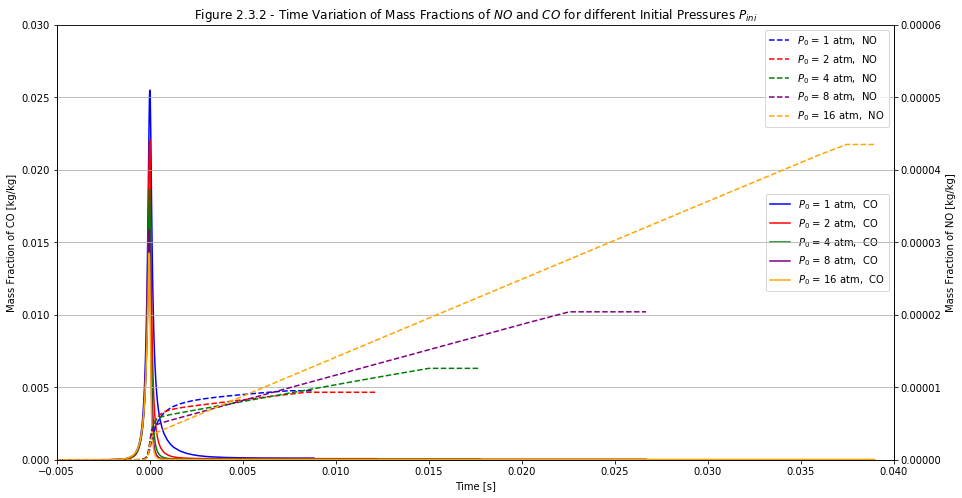

In [217]:
fig, axes1 = plt.subplots(figsize=(15,8))
axes2 = plt.twinx()
axes1.plot(Data1[0,:], Data1[3,:], color='blue', label=r'$P_0$ = 1 atm,  CO')
axes1.plot(Data2[0,:], Data2[3,:], color='red', label=r'$P_0$ = 2 atm,  CO')
axes1.plot(Data3[0,:], Data3[3,:], color='green', label=r'$P_0$ = 4 atm,  CO')
axes1.plot(Data4[0,:], Data4[3,:], color='purple', label=r'$P_0$ = 8 atm,  CO')
axes1.plot(Data5[0,:], Data5[3,:], color='orange', label=r'$P_0$ = 16 atm,  CO')
axes2.plot(Data1[0,:], Data1[2,:], '--', color='blue', label=r'$P_0$ = 1 atm,  NO')
axes2.plot(Data2[0,:], Data2[2,:], '--', color='red', label=r'$P_0$ = 2 atm,  NO')
axes2.plot(Data3[0,:], Data3[2,:], '--', color='green', label=r'$P_0$ = 4 atm,  NO')
axes2.plot(Data4[0,:], Data4[2,:], '--', color='purple', label=r'$P_0$ = 8 atm,  NO')
axes2.plot(Data5[0,:], Data5[2,:], '--', color='orange', label=r'$P_0$ = 16 atm,  NO')

plt.title('Figure 2.3.2 - Time Variation of Mass Fractions of $NO$ and $CO$ for different Initial Pressures $P_{ini}$')
axes1.set_xlabel('Time [s]')
axes1.set_ylabel('Mass Fraction of CO [kg/kg]')
axes2.set_ylabel('Mass Fraction of NO [kg/kg]')
axes1.legend(loc=5)
axes2.legend(loc=1)
plt.xlim([-0.005, 0.04])
axes2.set_ylim([0,0.00006])
axes1.set_ylim([0,0.03])
plt.grid(True)



 The NO and CO time variation of mass fractions for different initial pressures are also plotted individually below for improved scaling and viewing:



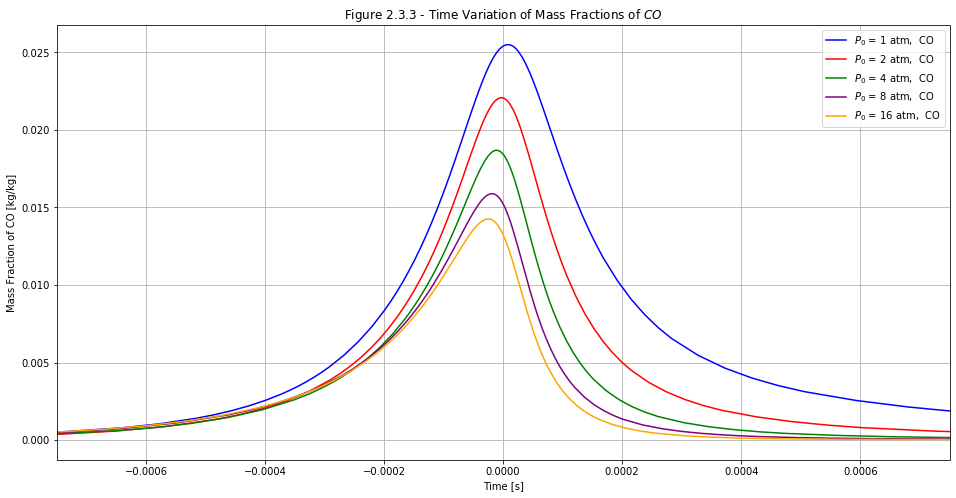

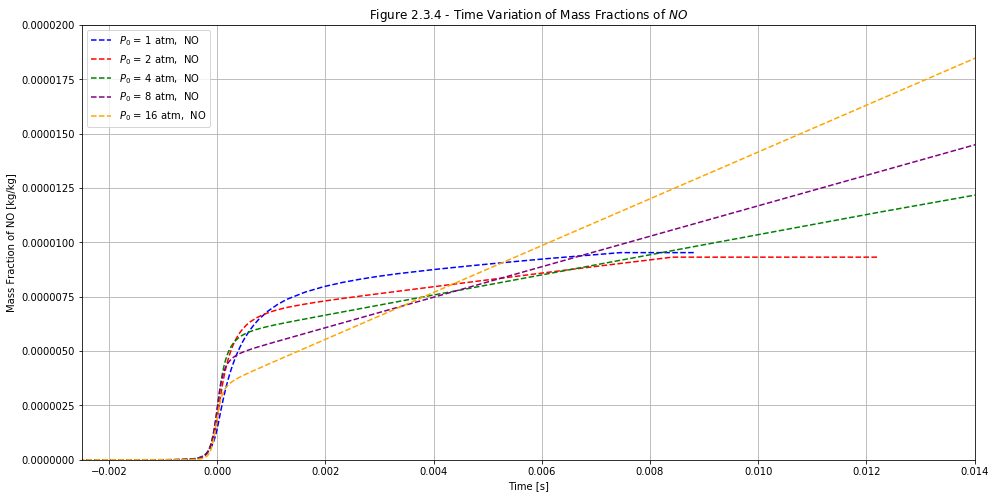

In [229]:
print('\n The NO and CO time variation of mass fractions for different initial pressures are also plotted individually below for improved scaling and viewing:\n')

fig2_3_3 = plt.figure(figsize=(16,8))
plt.plot(Data1[0,:], Data1[3,:], color='blue', label=r'$P_0$ = 1 atm,  CO')
plt.plot(Data2[0,:], Data2[3,:], color='red', label=r'$P_0$ = 2 atm,  CO')
plt.plot(Data3[0,:], Data3[3,:], color='green', label=r'$P_0$ = 4 atm,  CO')
plt.plot(Data4[0,:], Data4[3,:], color='purple', label=r'$P_0$ = 8 atm,  CO')
plt.plot(Data5[0,:], Data5[3,:], color='orange', label=r'$P_0$ = 16 atm,  CO')
plt.grid(True)
plt.title('Figure 2.3.3 - Time Variation of Mass Fractions of $CO$ ')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction of CO [kg/kg]')
plt.xlim([-0.00075, 0.00075])
plt.legend(loc=1)

fig2_3_4 = plt.figure(figsize=(16,8))
plt.plot(Data1[0,:], Data1[2,:], '--', color='blue', label=r'$P_0$ = 1 atm,  NO')
plt.plot(Data2[0,:], Data2[2,:], '--', color='red', label=r'$P_0$ = 2 atm,  NO')
plt.plot(Data3[0,:], Data3[2,:], '--', color='green', label=r'$P_0$ = 4 atm,  NO')
plt.plot(Data4[0,:], Data4[2,:], '--', color='purple', label=r'$P_0$ = 8 atm,  NO')
plt.plot(Data5[0,:], Data5[2,:], '--', color='orange', label=r'$P_0$ = 16 atm,  NO')
plt.grid(True)
plt.title('Figure 2.3.4 - Time Variation of Mass Fractions of $NO$')
plt.xlabel('Time [s]')
plt.ylabel('Mass Fraction of NO [kg/kg]')
plt.xlim([-0.0025, 0.014])
plt.ylim([0, 0.00002])
plt.legend(loc=2)

<br>

#### Discussion:
Figure 2.3.4 shows that peak NO emissions increase with increasing initial pressure while Figure 2.3.3 shows that CO emissions decrease.

With regard to CO emissions we also see that for increasing pressure, the time taken to reach peak mass fraction decreases, whereas for the NO emissions, the time taken to reach peak mass fraction increases with pressure. The reason for the increase in NO emissions may be attributed to the Zeldovich mechanism.

<br>

<a id='Section2_3_3'><a>

### 2.3.3 - Calculating Flame Thickness for Varying Initial Pressures
<br>

For $T_{ini} \,=\, 600\,K$ and $\phi \,=\, 0.6$, the flame thickness ($\,\delta_D\,$) will be calculated and plottd as function of initial pressures $\,P_{ini}\,$ between $1$ and $16$ atm. 

Note that:
$$ \delta_D \;=\; \frac{\lambda}{f^0\,C_P} $$

where $\lambda$ is the heat conductivity, $\,f^0$ is the laminar burning flux, and $C_P$ is the heat capacity. 

<br>

In [230]:
# Initialize Parameters
To = 600        # K
Po = np.array([1.0, 2.0, 4.0, 8.0, 16.0])    # atm
SL = np.zeros(len(Po))
Conductivity = np.zeros(len(Po))
Density = np.zeros(len(Po))
Cp = np.zeros(len(Po))
Thickness = np.zeros(len(Po))

for k in range(len(Po)):
    gas = ct.Solution('gri30.cti')
    gas.TPX = To, Po[k]*ct.one_atm, 'CH4:0.6, O2:2, N2:7.52'
    width = 0.014
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    # Solve
    flame.solve(loglevel=loglevel, auto=True)
    SL[k] = flame.u[0]
    Conductivity[k] = flame.thermal_conductivity[0] # W/m.K
    Cp[k] = flame.cp_mass[0]  # J/kg.K
    Density[k] = flame.density_mass[0]  # kg/m^3
    
    Thickness[k] = (Conductivity[k] / (SL[k]*Density[k]*Cp[k])) # m
    
    


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.695e-05      4.689
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009731      4.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.247e-05      6.451
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002774      4.523
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH

Take 10 timesteps     6.407e-05      4.295
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642      4.141
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001169      4.488
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.463e-05      6.628
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.000125      4.714
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003203      3.609
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.08209     -1.169
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accomodate flame thickness. New width: 0.028 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 

Attempt Newton solution of steady-state problem...    success.

Problem solved on [124] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      3.998
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004105      3.982
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01052      3.287
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.778e-05      5.517
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.041e-05      6.652
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002

Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2OH CH3 CH3CHO CH3O CH3OH CO H H2 H2O2 HCCO HCO HO2 O OH 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [126] point grid(s).

..............................................................................
no new points needed in flame

************ Solving on 8 point grid with energy equation enabled ************

..................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [80] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 N2O NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [98] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    

Attempt Newton solution of steady-state problem...    success.

Problem solved on [54] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 19 20 21 22 23 24 25 26 27 28 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [64] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New poi



At P0 =  1.00, the flame thickness is :  0.01143 cm
At P0 =  2.00, the flame thickness is :  0.00790 cm
At P0 =  4.00, the flame thickness is :  0.00574 cm
At P0 =  8.00, the flame thickness is :  0.00431 cm
At P0 = 16.00, the flame thickness is :  0.00314 cm


The plot of Flame Thickness versus initial pressure is given below:



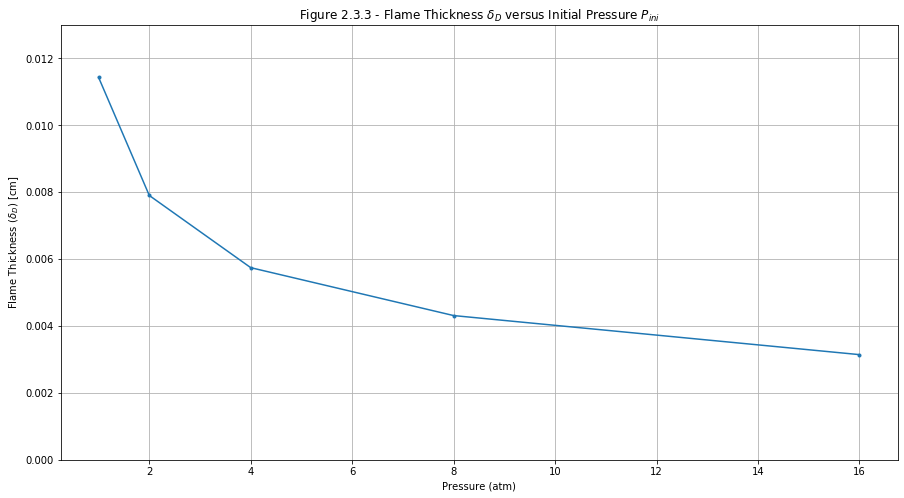

In [234]:
print('\n')
for i in range(len(Po)):
    print('At P0 = %5.2f, the flame thickness is :  %5.5f cm'%(Po[i],Thickness[i]*100))
    
print('\n\nThe plot of Flame Thickness versus initial pressure is given below:\n')
fig = plt.figure(figsize=(15,8))
plt.plot(Po, Thickness*100,'.-')

plt.title('Figure 2.3.3 - Flame Thickness $\delta_D$ versus Initial Pressure $P_{ini}$')
plt.xlabel('Pressure (atm)')
plt.ylabel('Flame Thickness ($\delta_D$) [cm]')
plt.ylim([0,0.013])
plt.grid(True)


#### Discussion:


<br>

Similar to the flame speed, as pressure increases, laminar flame thickness decreases. This is because, as mentioned beforehand, the pressure change impacts the density and as a result the flame expansion is decreased.

<br>
<a id='Section2_4'><a>

## 2.4 - Bonus Question: Sensitivity Analysis

<br>

In this section, the sensitivity of the laminar flame speed will be examined at different richnesses using GRI chemical kinetic mechanism. This is done to see which reactions affect the flame speed the most.

The logarithmic sensitivity is defined as:

$$Sensitivity=\frac{\partial ln(S_{u})}{\partial ln(k)}$$

where $S_u$ is the laminar flame speed, and $k$ is the reaction rate constant. 

Each reaction is individually perturbed by 0.01 and then the impact of Su is calculated. The 10 most sensitive reactions for different equivalence ratios $\,\phi\,=\,0.5,\,1.0,\,1.5\,$ will be found and plotted.

<br>

In [235]:
import pandas as pd
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

gas = ct.Solution('gri30.cti')

# Create dataframes to store sensitivity-analysis data
sensitivities_1 = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))
sensitivities_2 = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))
sensitivities_3 = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))

# Set the value of the perturbation
dk = 1e-2

# Create an empty column to store the sensitivities data
sensitivities_1["baseCase"] = ""
sensitivities_2["baseCase"] = ""
sensitivities_3["baseCase"] = ""

# Initialize Arrays
phi = np.array([0.5,1.0,1.5])
SL = np.zeros((3))


for i in range(len(phi)):    
    To = 300
    Po = 101325
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi[i]
    width = 0.01
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1

    flame.solve(loglevel=loglevel)
    SL[i] = flame.u[0]

    for m in range(gas.n_reactions):
        gas.set_multiplier(1.0)                                                                
        gas.set_multiplier(1+dk, m)
        flame.solve(loglevel=0, refine_grid=False)
        Su = flame.u[0]
        if (i==0):
            sensitivities_1["baseCase"][m] = (Su-SL[i])/(SL[i]*dk) 
        if (i==1):
            sensitivities_2["baseCase"][m] = (Su-SL[i])/(SL[i]*dk)
        if (i==2):
            sensitivities_3["baseCase"][m] = (Su-SL[i])/(SL[i]*dk)

    gas.set_multiplier(1.0)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      3.225
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006568      3.204
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02806      2.184
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.4794     0.3481
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H6 CH2 CH2CO CH2O CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
##############

Take 10 timesteps       0.01403      2.767
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.2397     0.7356
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH2 NH3 NO NO2 O O2 OH T point 1 point 3 point 4 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.898e-05      6.273
Attempt Newton solu

Attempt Newton solution of steady-state problem...    success.

Problem solved on [149] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 55 
    to resolve point 55 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [150] point grid(s).

..............................................................................
no new points needed in flame

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      3.979
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7

In [242]:
sensitivities_1.head()

,baseCase
2 O + M <=> O2 + M,0.00283556
H + O + M <=> OH + M,0.00238914
H2 + O <=> H + OH,0.0234294
HO2 + O <=> O2 + OH,-0.0089781
H2O2 + O <=> HO2 + OH,-0.0047739


In [239]:
sensitivities_2.head()

,baseCase
2 O + M <=> O2 + M,0.00178853
H + O + M <=> OH + M,0.000983067
H2 + O <=> H + OH,0.0252541
HO2 + O <=> O2 + OH,0.00306899
H2O2 + O <=> HO2 + OH,0.000666774


In [241]:
sensitivities_3.head()

,baseCase
2 O + M <=> O2 + M,-0.00348208
H + O + M <=> OH + M,-0.00342461
H2 + O <=> H + OH,0.035505
HO2 + O <=> O2 + OH,0.00252988
H2O2 + O <=> HO2 + OH,-0.00334974


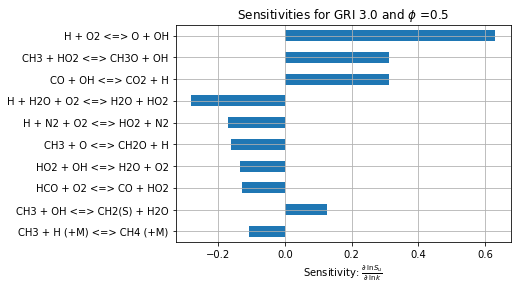

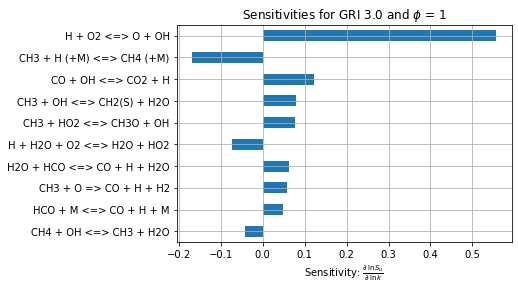

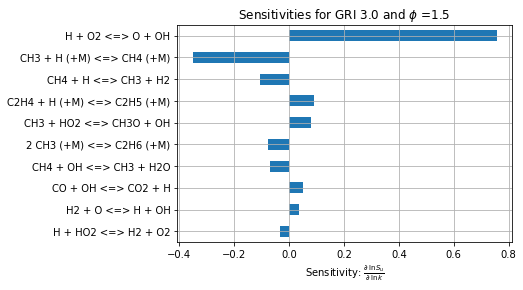

In [262]:
threshold1 = 0.105
threshold2 = 0.035
threshold3 = 0.030
firstColumn_1 = sensitivities_1.columns[0]
firstColumn_2 = sensitivities_2.columns[0]
firstColumn_3 = sensitivities_3.columns[0]

sensitivities_1_Subset = sensitivities_1[sensitivities_1[firstColumn_1].abs() > threshold1]
sensitivities_2_Subset = sensitivities_2[sensitivities_2[firstColumn_2].abs() > threshold2]
sensitivities_3_Subset = sensitivities_3[sensitivities_3[firstColumn_3].abs() > threshold3]
indicesMeetingThreshold_1 = sensitivities_1_Subset[firstColumn_1].abs().sort_values(ascending=False).index
indicesMeetingThreshold_2 = sensitivities_2_Subset[firstColumn_2].abs().sort_values(ascending=False).index
indicesMeetingThreshold_3 = sensitivities_3_Subset[firstColumn_3].abs().sort_values(ascending=False).index
sensitivities_1_Subset.loc[indicesMeetingThreshold_1].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ =0.5",legend=None)

plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.grid(True)
plt.show()
sensitivities_2_Subset.loc[indicesMeetingThreshold_2].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ = 1",legend=None)
plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.grid(True)
plt.show()
sensitivities_3_Subset.loc[indicesMeetingThreshold_3].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ =1.5",legend=None)
plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.grid(True)
plt.show()

For $\phi$ = 0.5 (lean), we see that the sensitivities are the least varied between the other equivalance ratio conditions. The most sensitive reaction is a chain branching step of:

$$ H + O_2 \leftrightarrow O + OH $$

It can also be seen that reaction steps leading to species oxidation are shown to be favoured for the fuel lean condition due to the abundance of oxidizers. It is interesting to note that there are no initiations reaction listed in the top 10 most sensitive reactions.

For $\phi$ = 1.0 (stoichiometric), we see that the most sensitive reaction is also the same chain branching step as the one previously mentioned:

$$ H + O_2 \leftrightarrow O + OH $$

For $\phi$ = 1.5 (rich), we see that, again the most sensitive reaction is the same chain branching reaction:

$$ H + O_2 \leftrightarrow O + OH $$

It can also be seen that the reactions involving the reformulation of carbon have a higher sensitivity for the rich equivalence ratio due to the abundance of the carbon based fuel.

In essence, the top reaction for all equivalence ratios was a chain branching reaction, while the second one was termination reactions, and third to be chain propagation reactions. The least sensitive in general, were initiation reactions.


<a id='Conclusion'><a>

# Conclusion:


This project presented various applications of premixed and non-premixed flames.

Section 1 of this report looked at the characteristics of a counter flow non-premixed flame, which was simulated using Cantera. Flame temperature and mass concentrations were computed and plotted versus the nozzle spacing, as well as versus the Bilger's Mixture Fraction, which was introduced throughout the report. The results agreed mostly with the Burke Schumann analytical solution. The variation of these parameters as a result of changes in air nozzle velocity and fuel composition was also studied.

Section 2 looked at an un-stretched, freely-propagating, laminar premixed flame, where the flame structure and emissions was explored. The effects of equivalence ratio, diluents, and pressure were determined in relation to laminar flame speed. The variation of these parameters as a result of changes in equivalence ratios were determined as well.